# Machine Learning (Mini Project) :-
## Dry_Bean (Multiclass Classification) :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import collections
import time
%matplotlib inline

In [2]:
df1 = pd.read_excel("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\Dry_Bean_Dataset.xlsx")
df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
df1.nunique()

Area               12011
Perimeter          13416
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
df1.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
df1.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
df1.describe(include='object')

,Class
count,13611
unique,7
top,DERMASON
freq,3546


In [8]:
df1.duplicated().sum()

68

In [9]:
df1.drop_duplicates(inplace=True)
df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [10]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df1['Class'] = LE.fit_transform(df1['Class'])

In [11]:
df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [12]:
df1['Class'].value_counts()

3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: Class, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

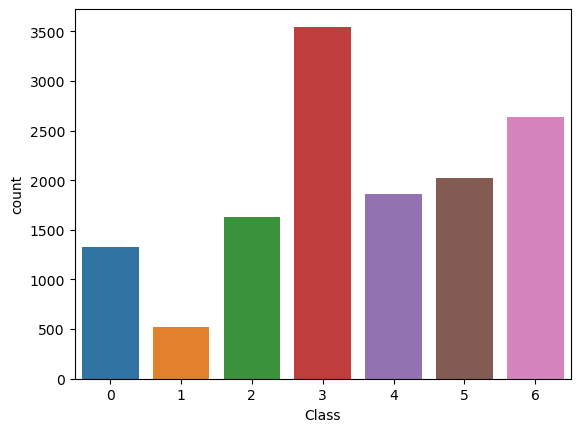

In [13]:
sb.countplot(df1['Class'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


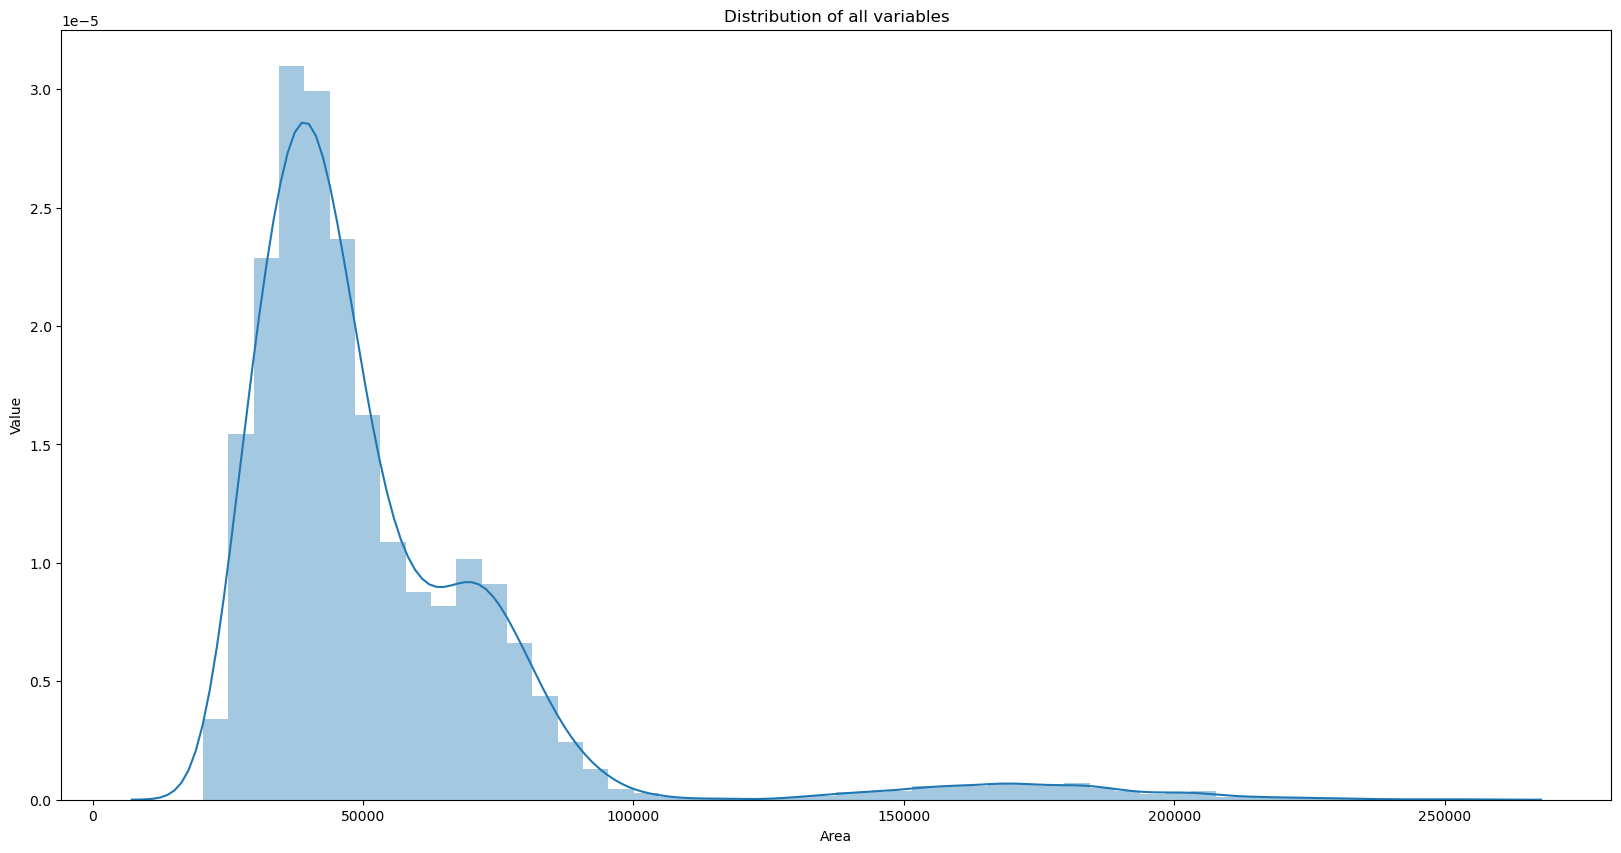

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


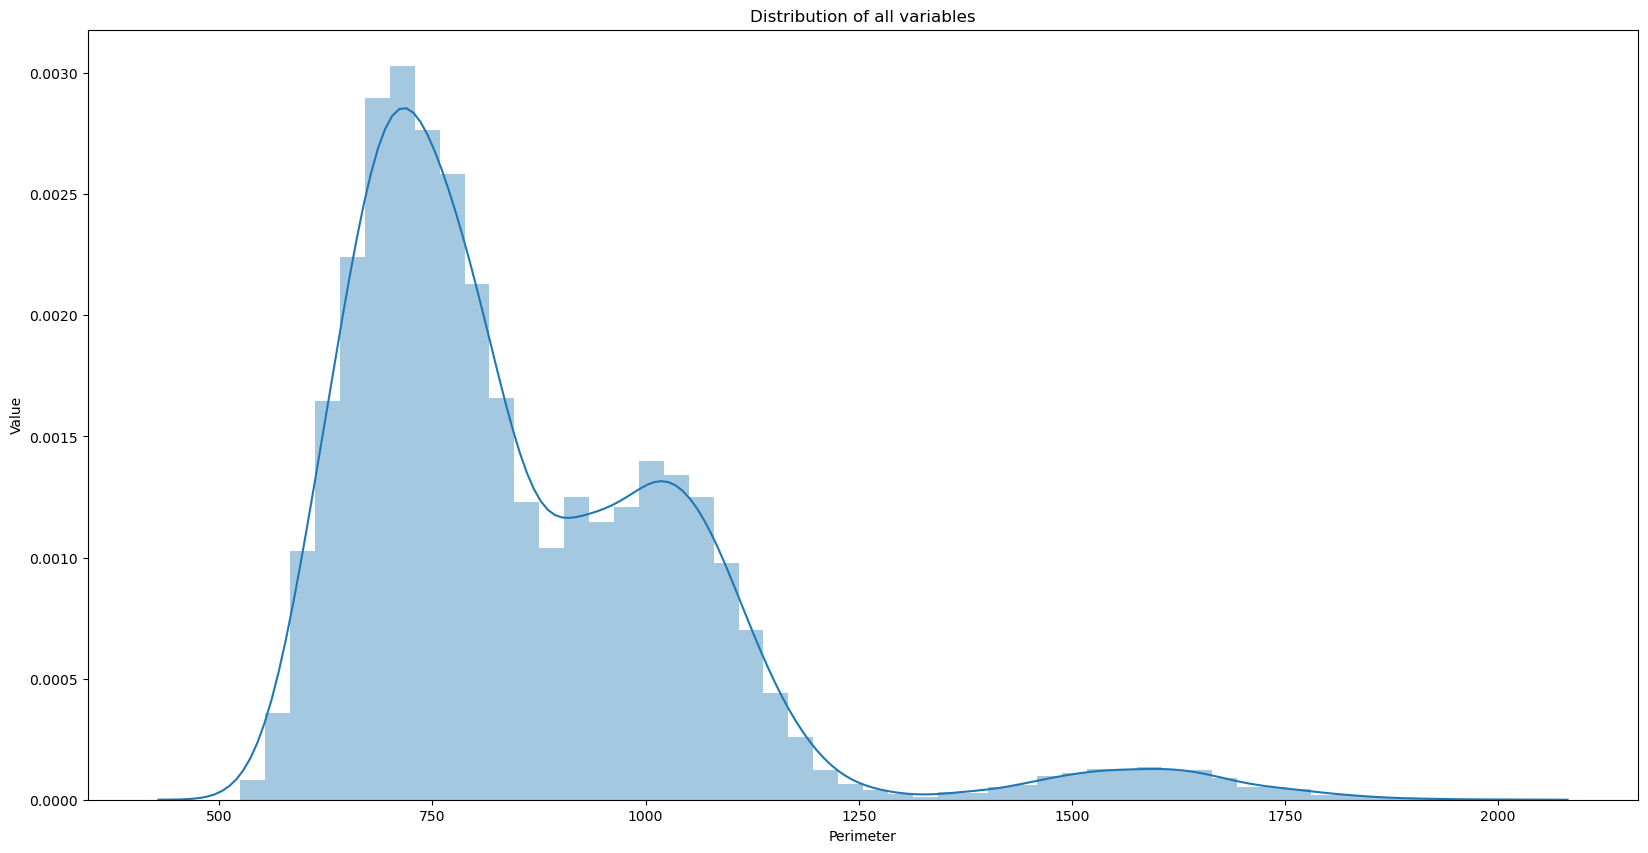

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


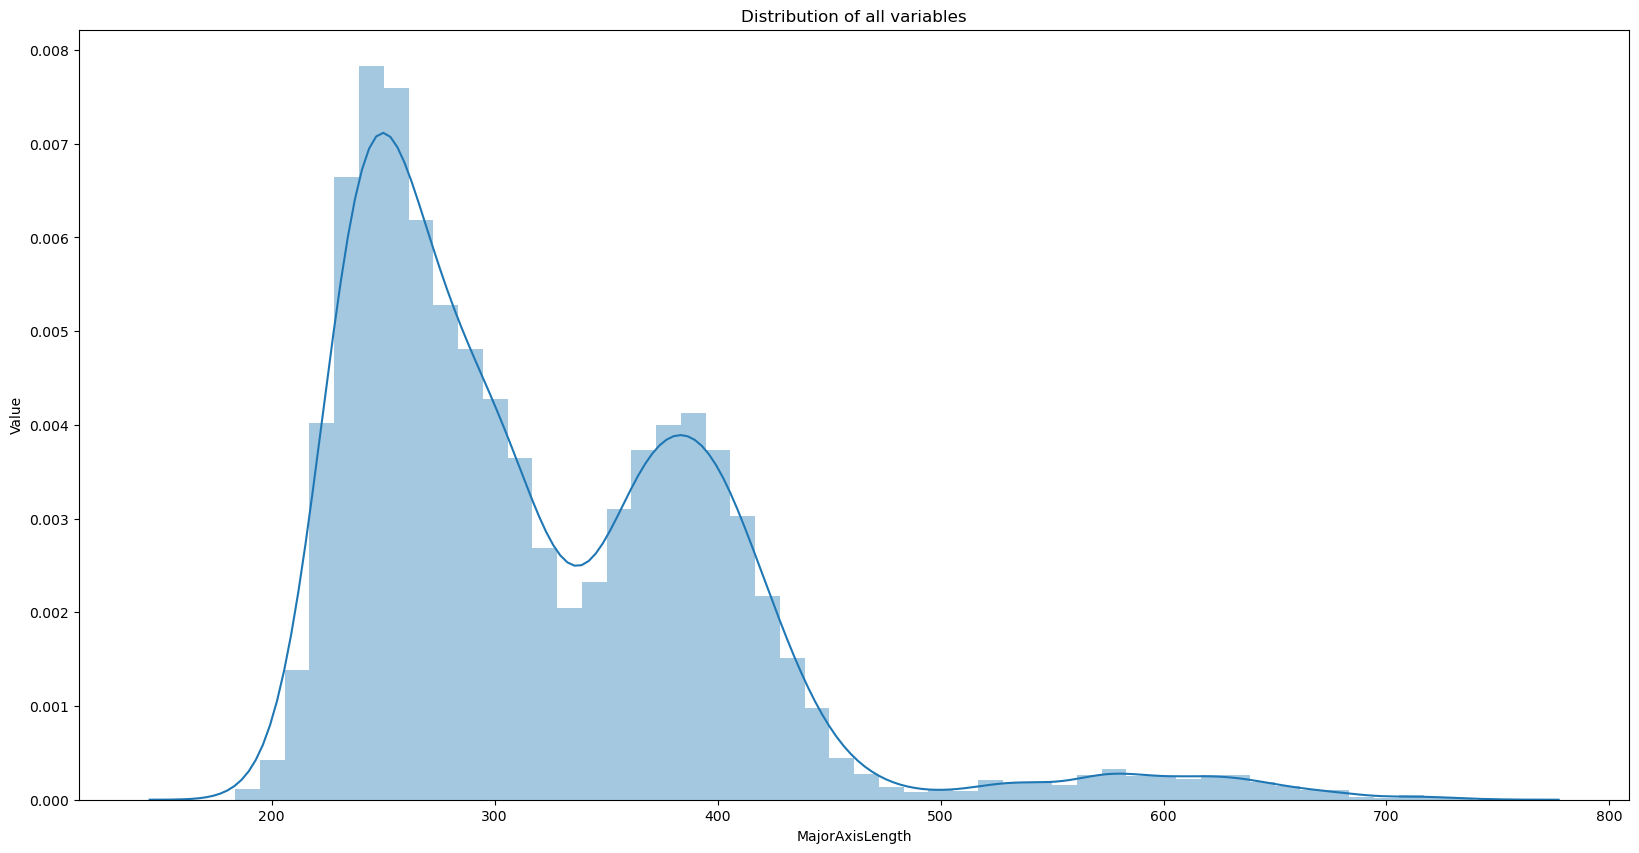

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


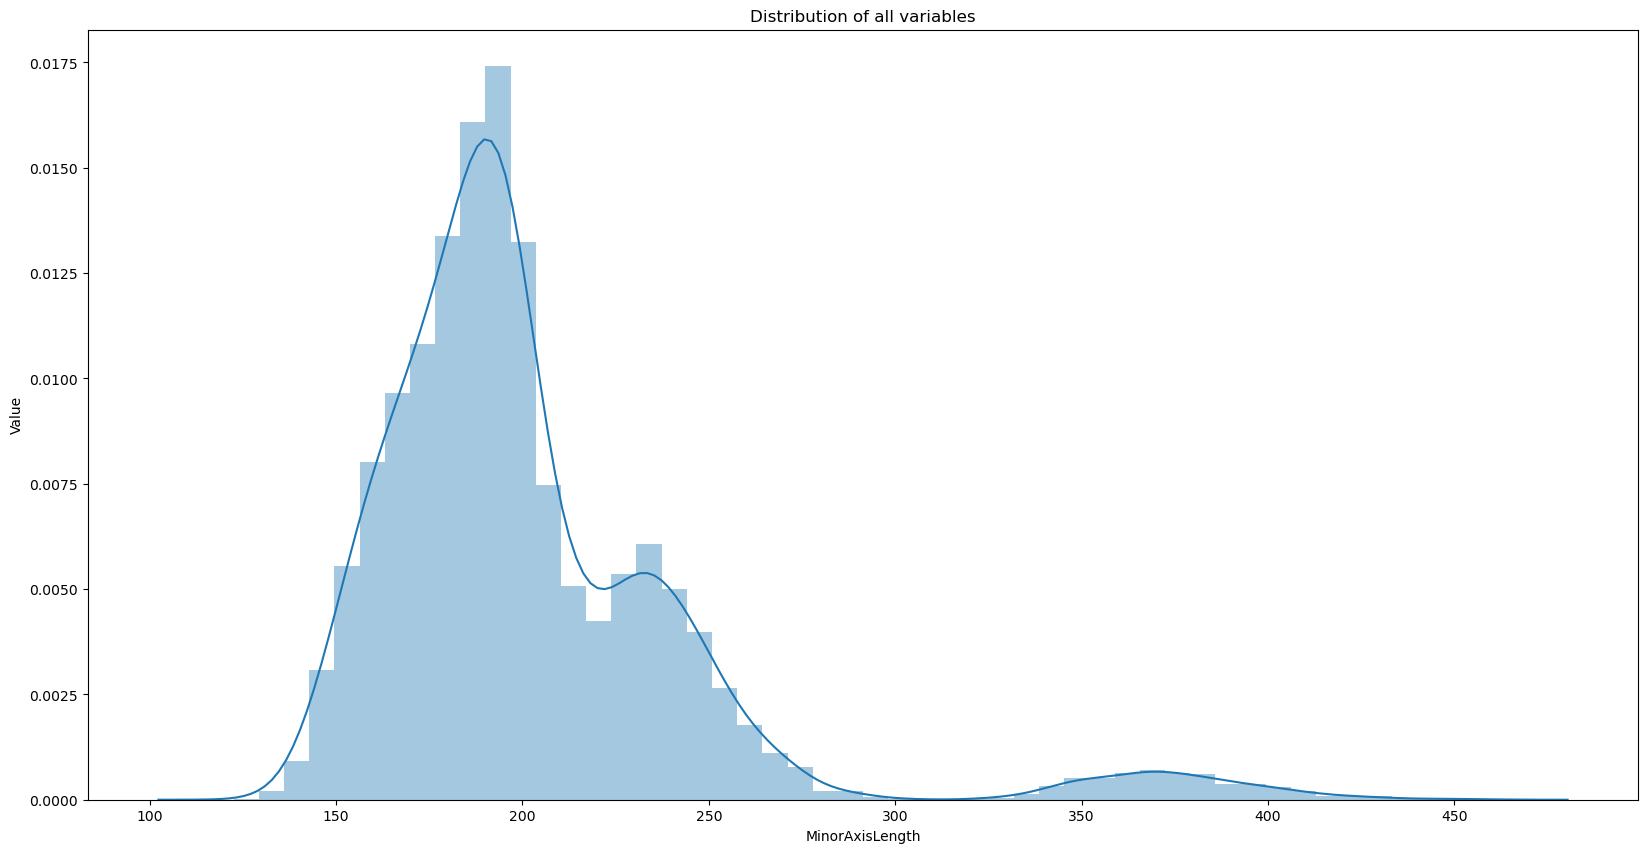

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


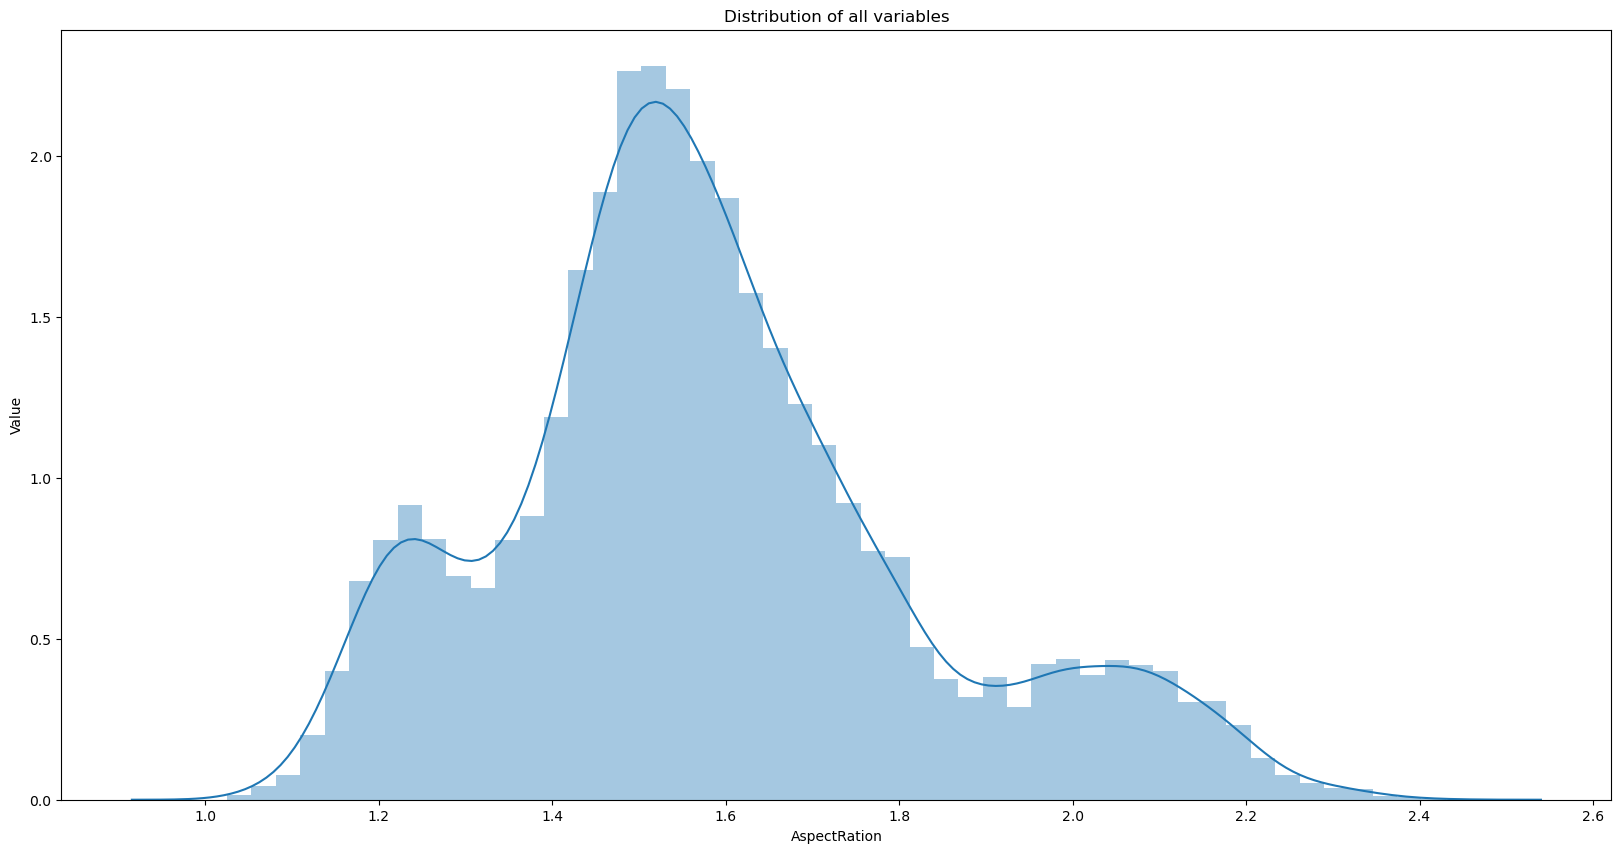

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


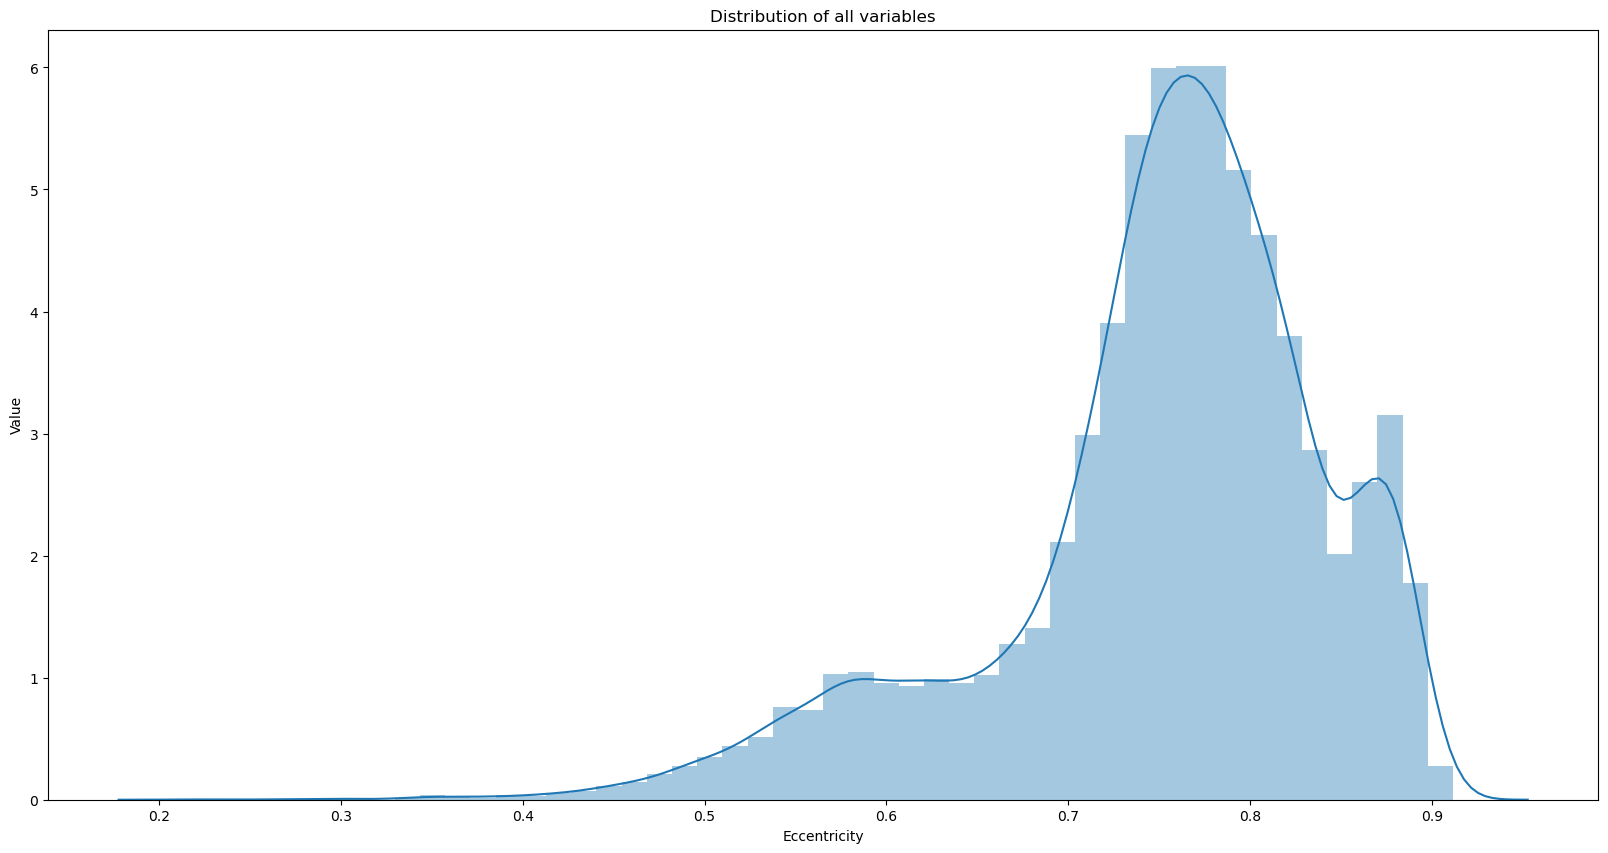

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


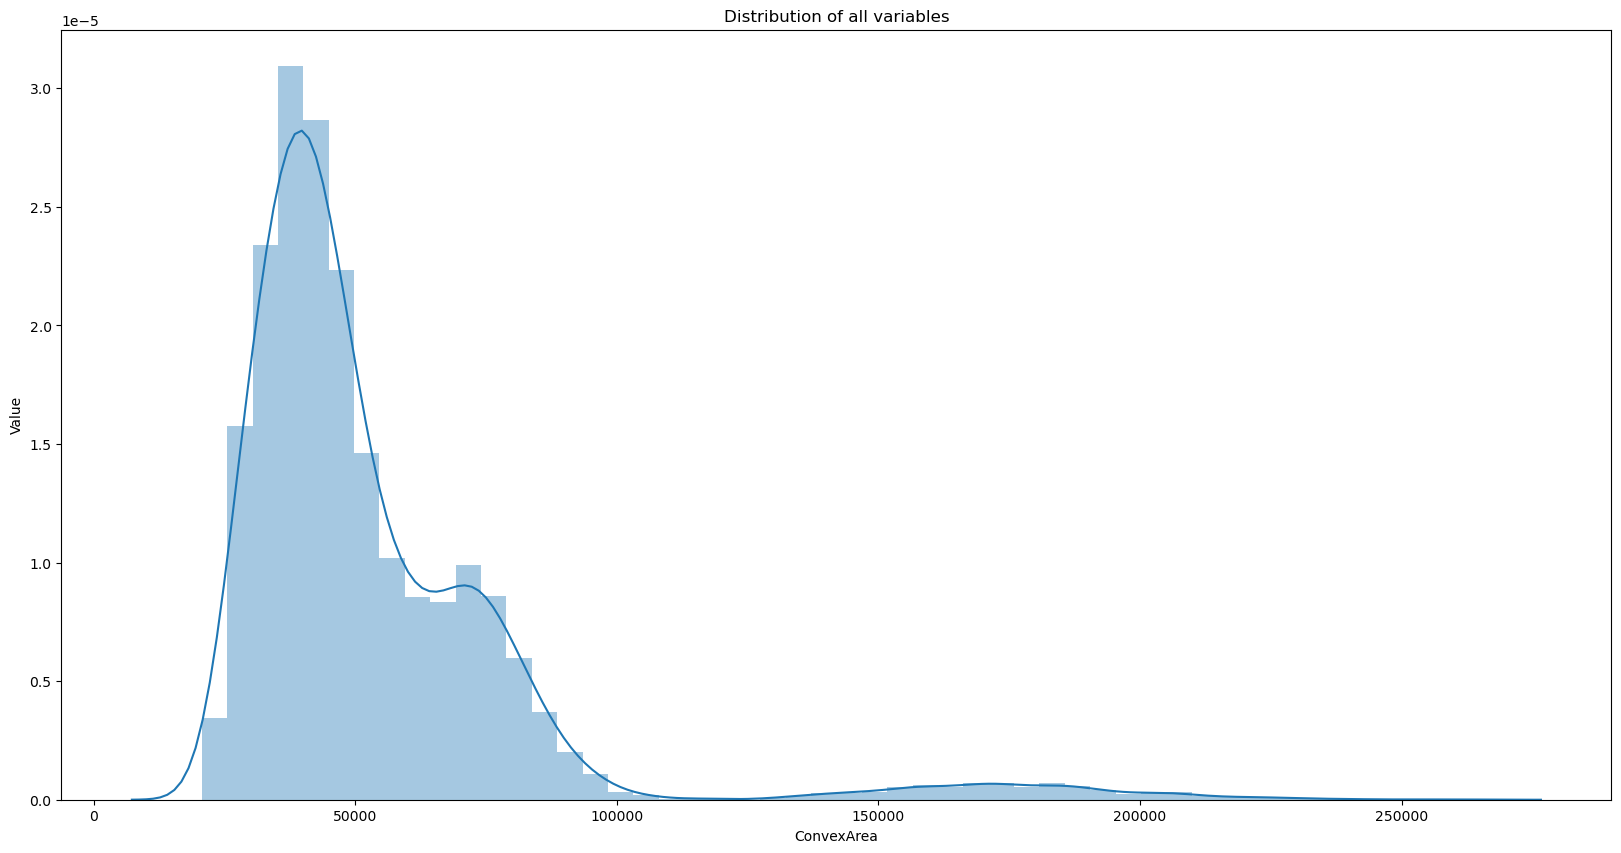

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


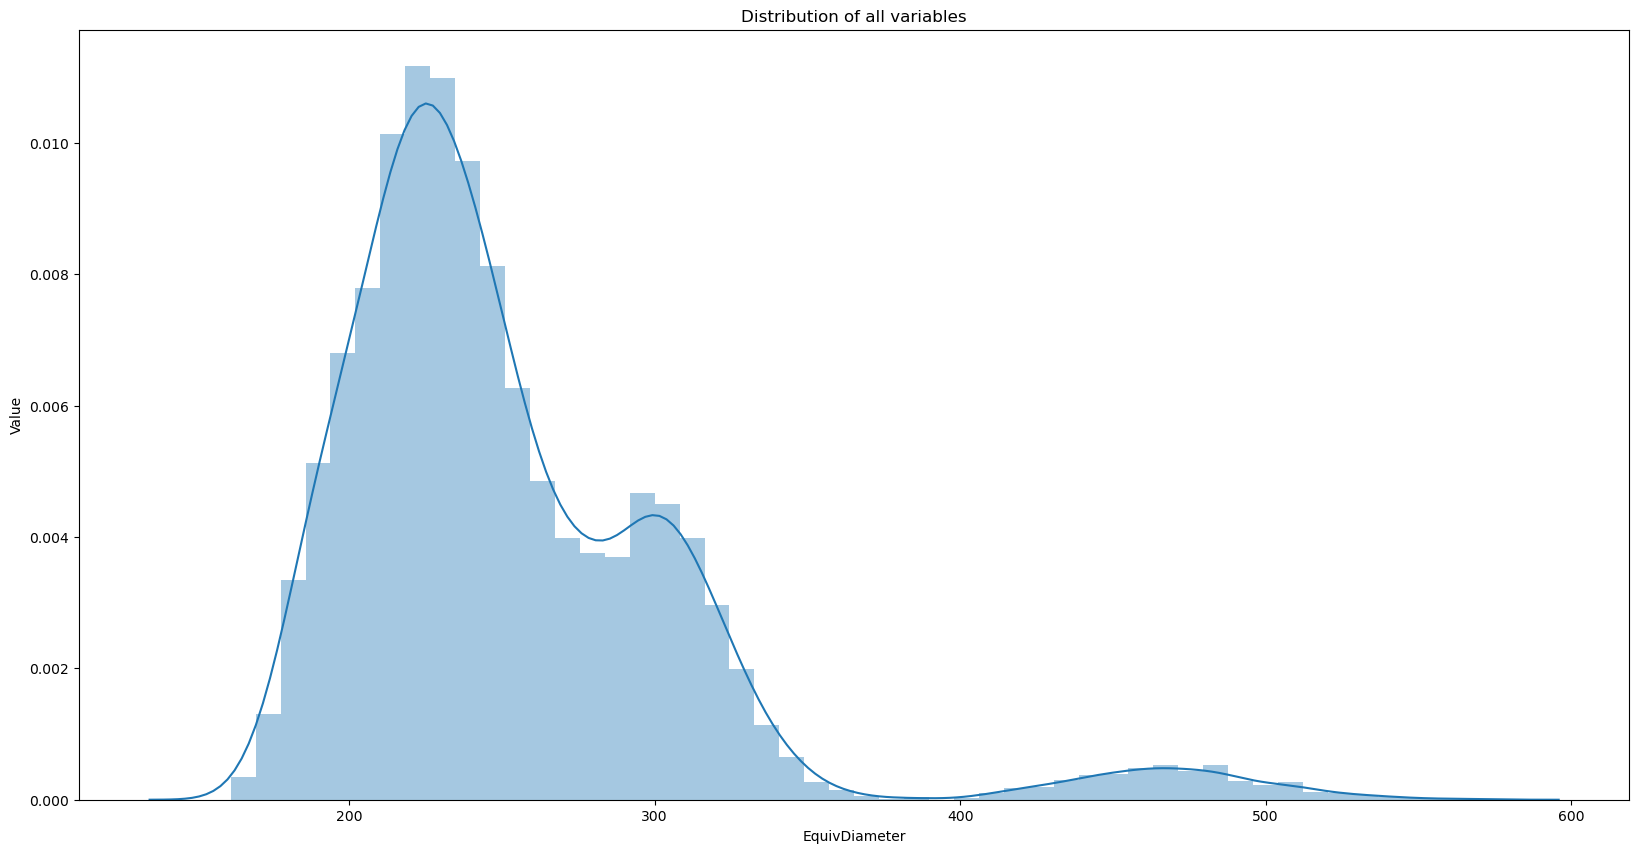

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


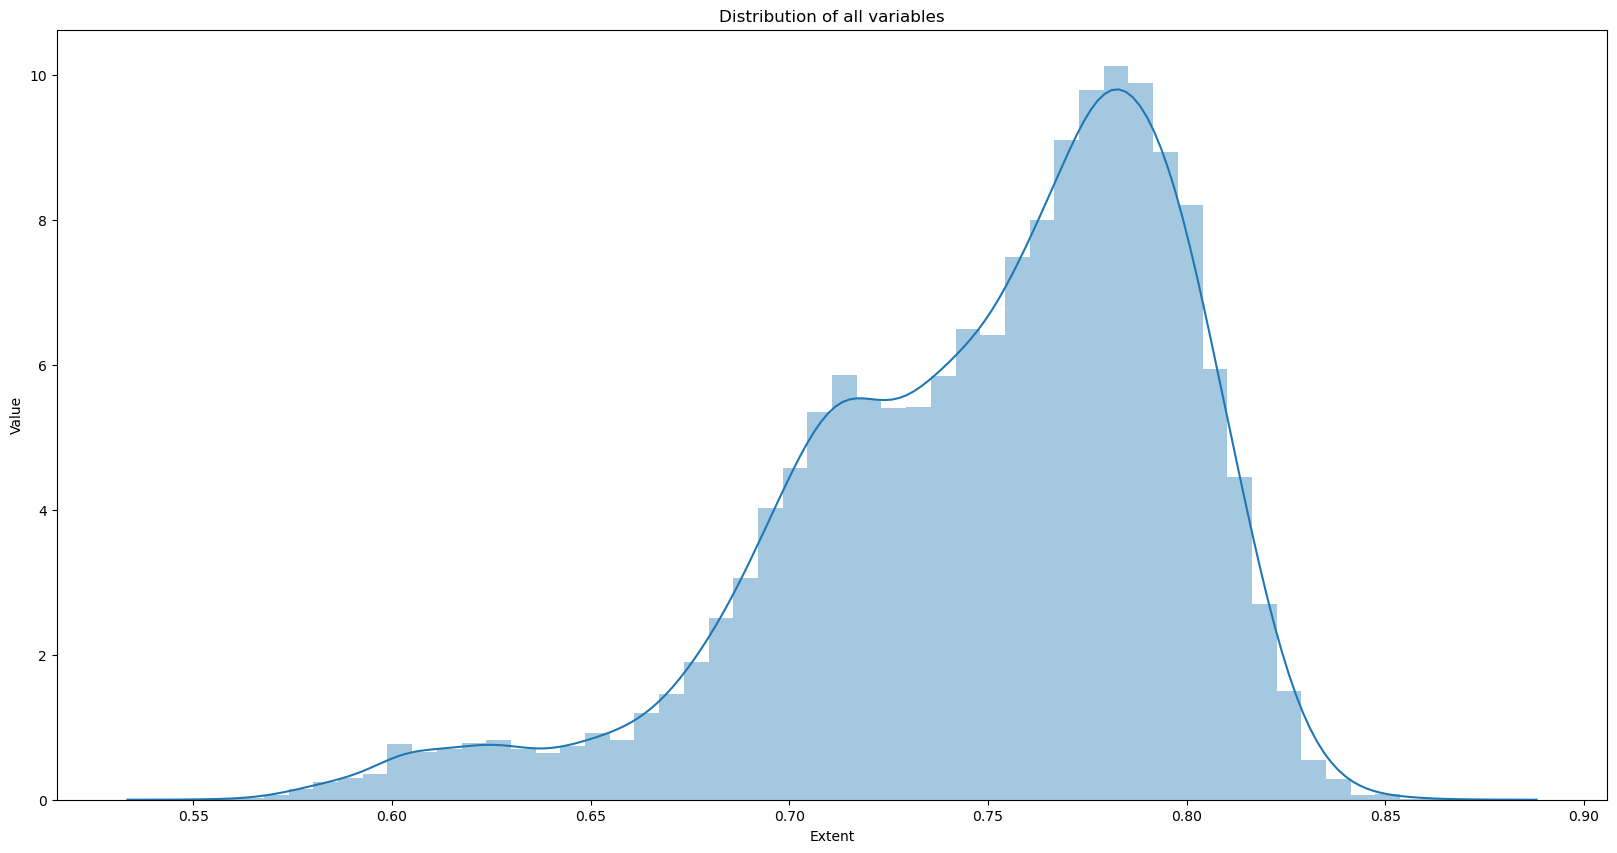

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


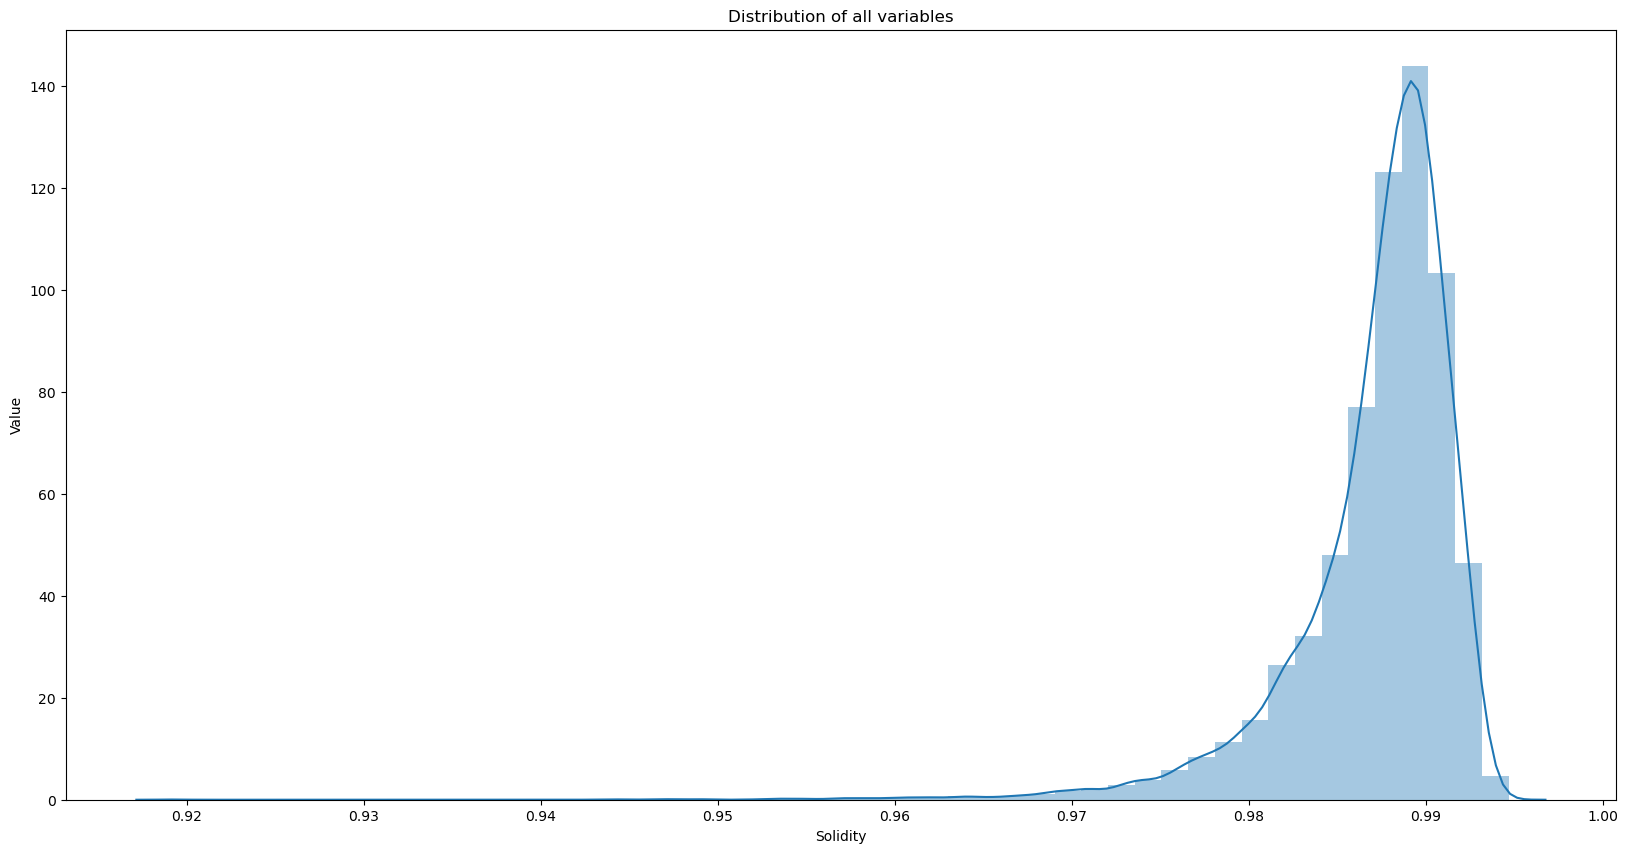

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


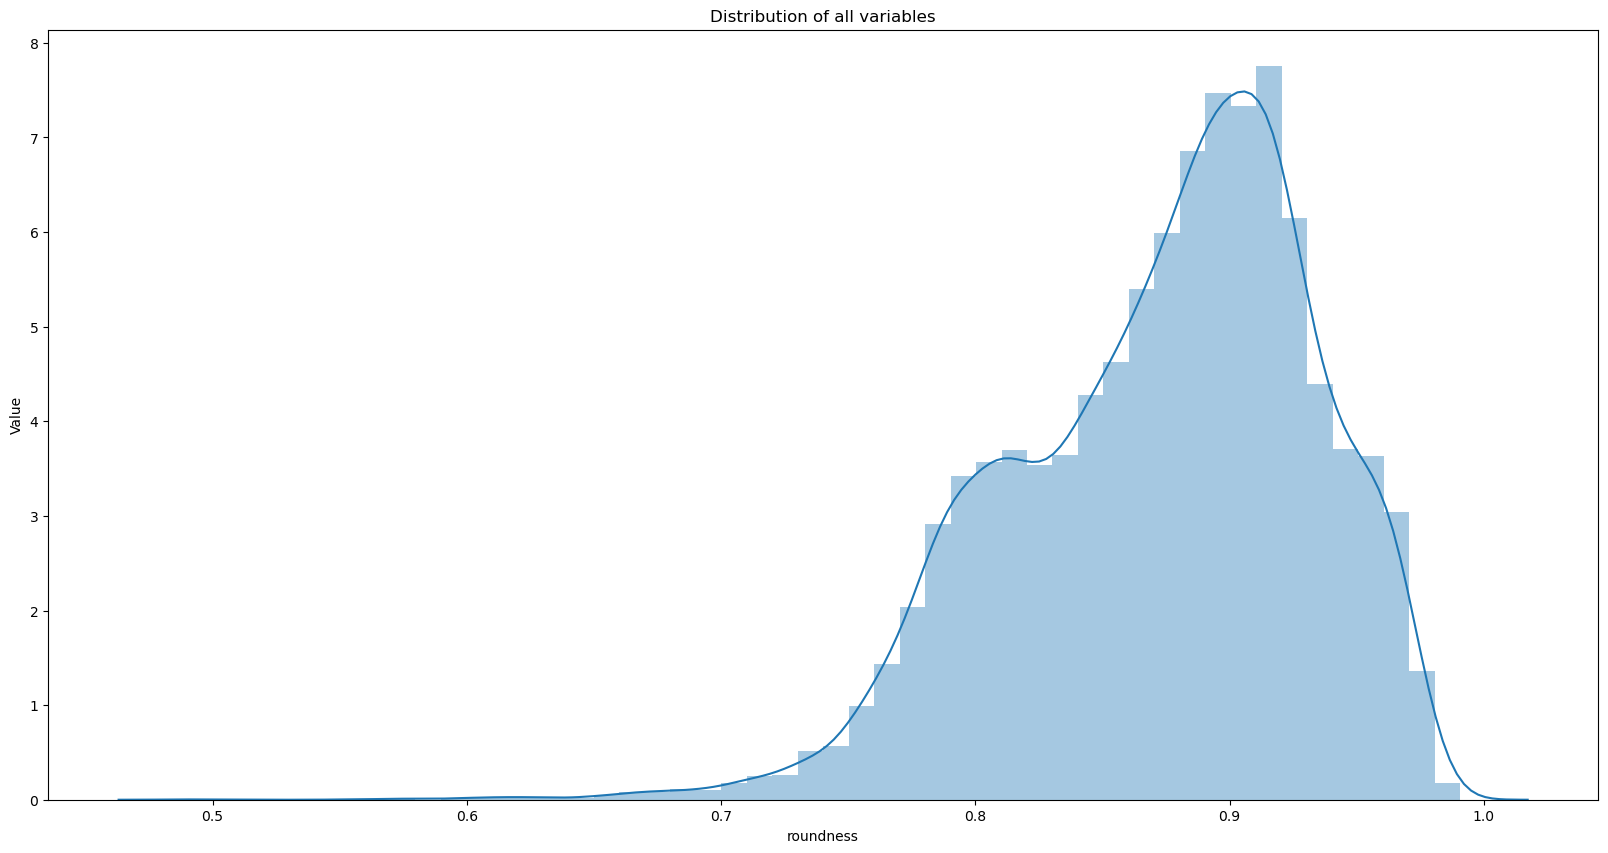

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


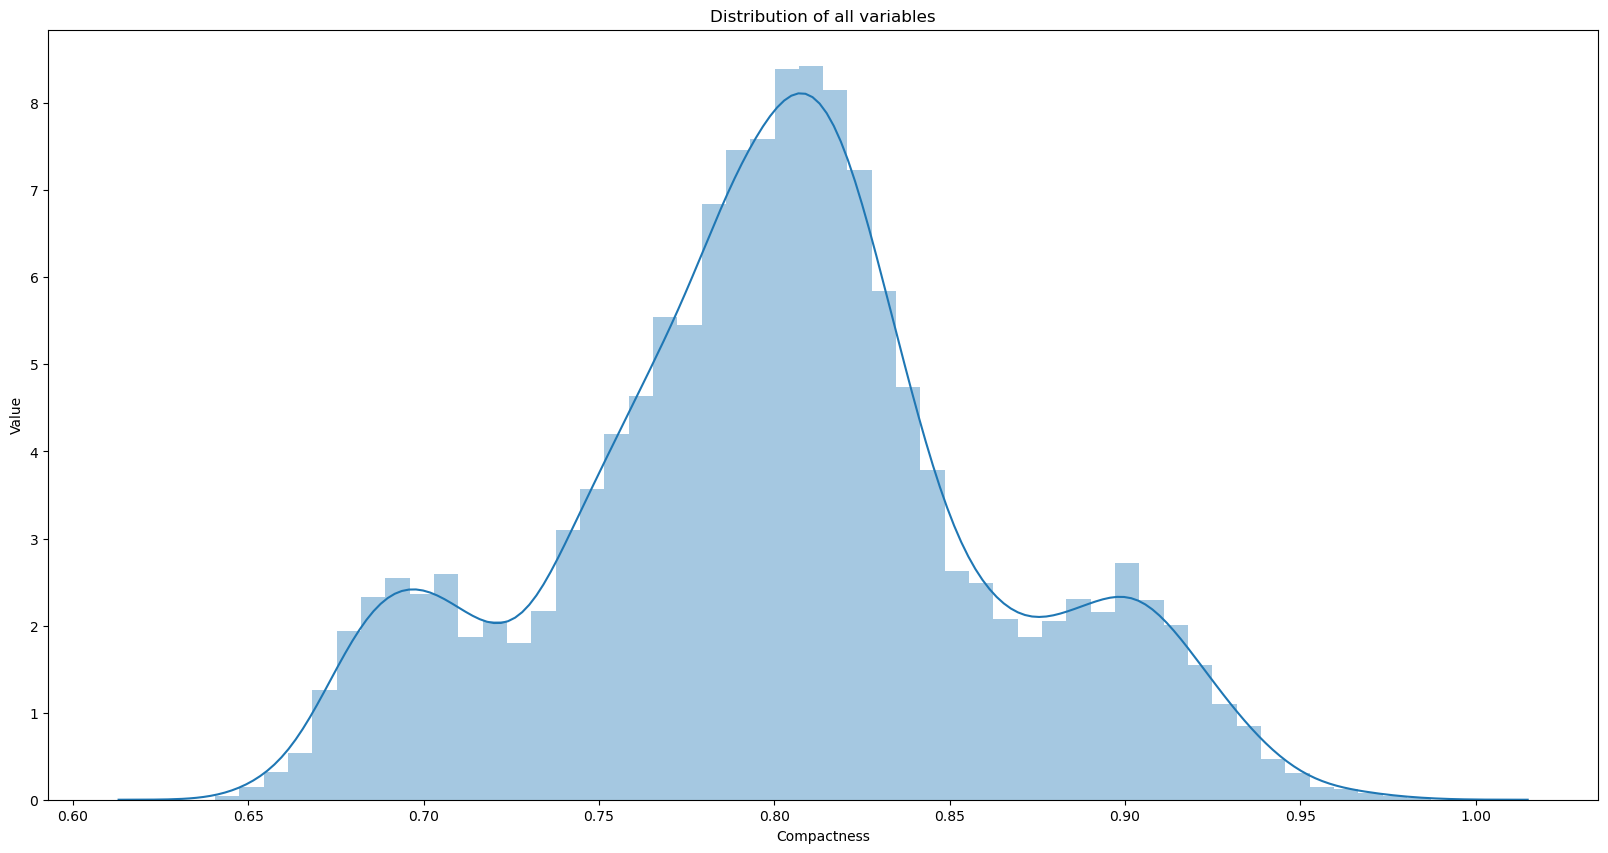

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


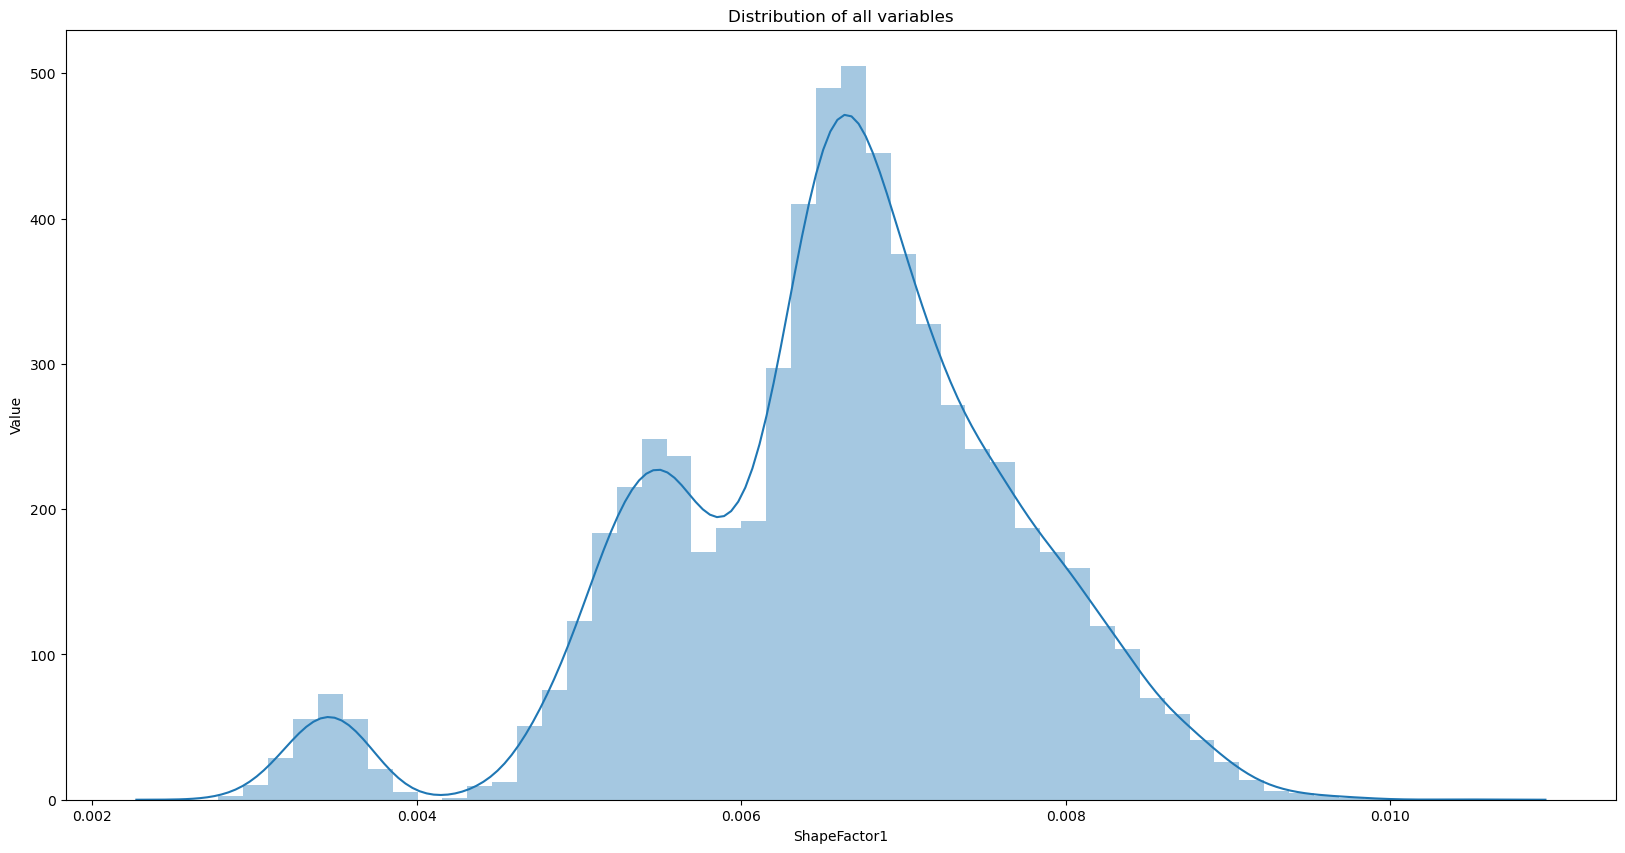

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


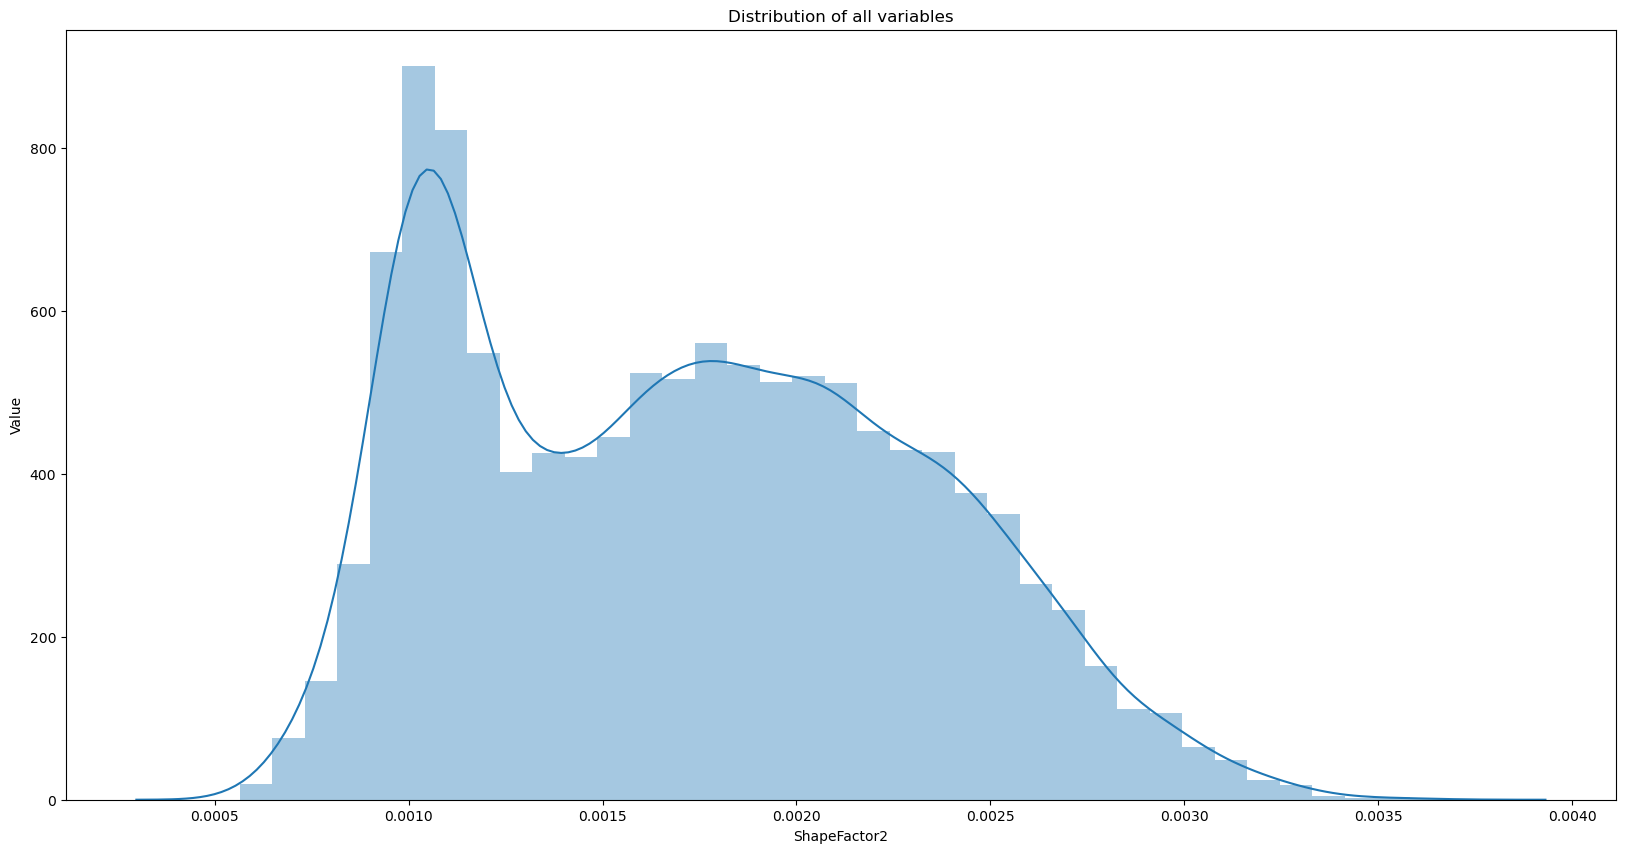

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


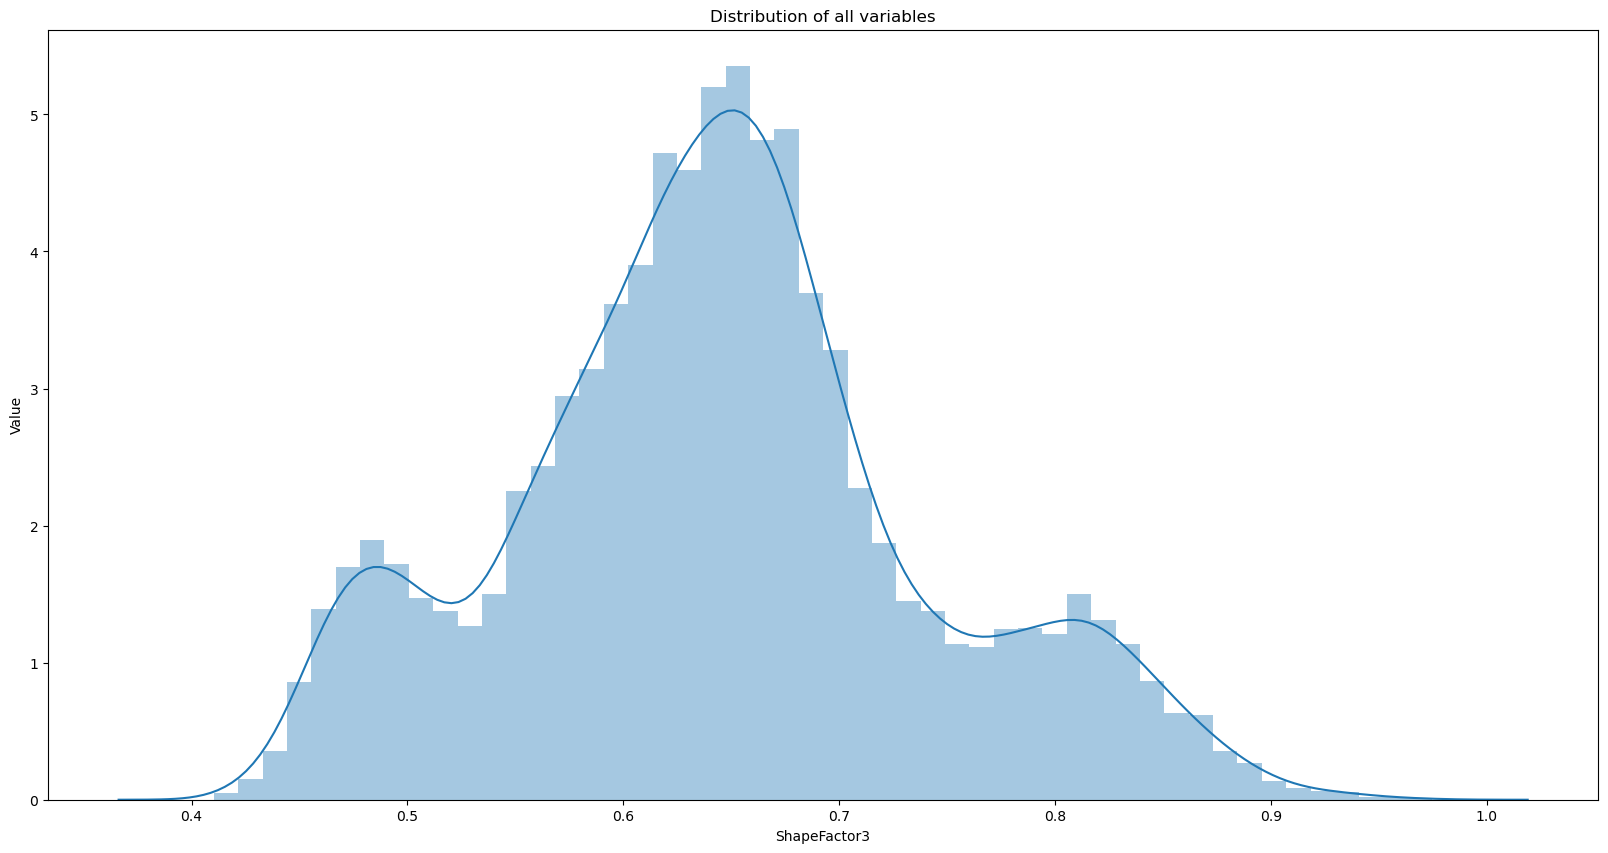

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


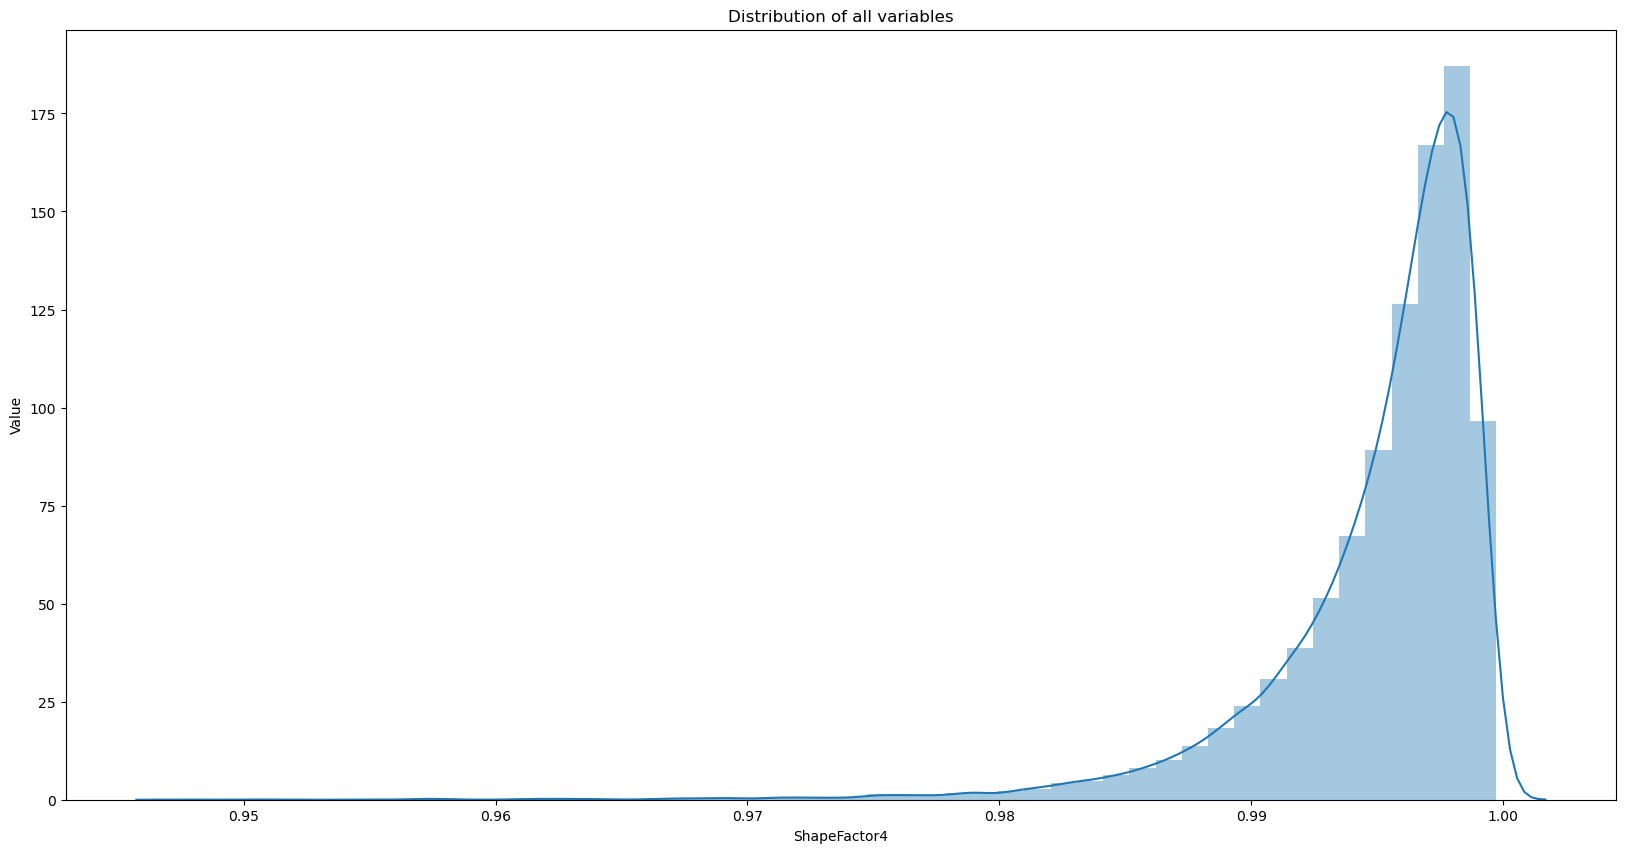

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


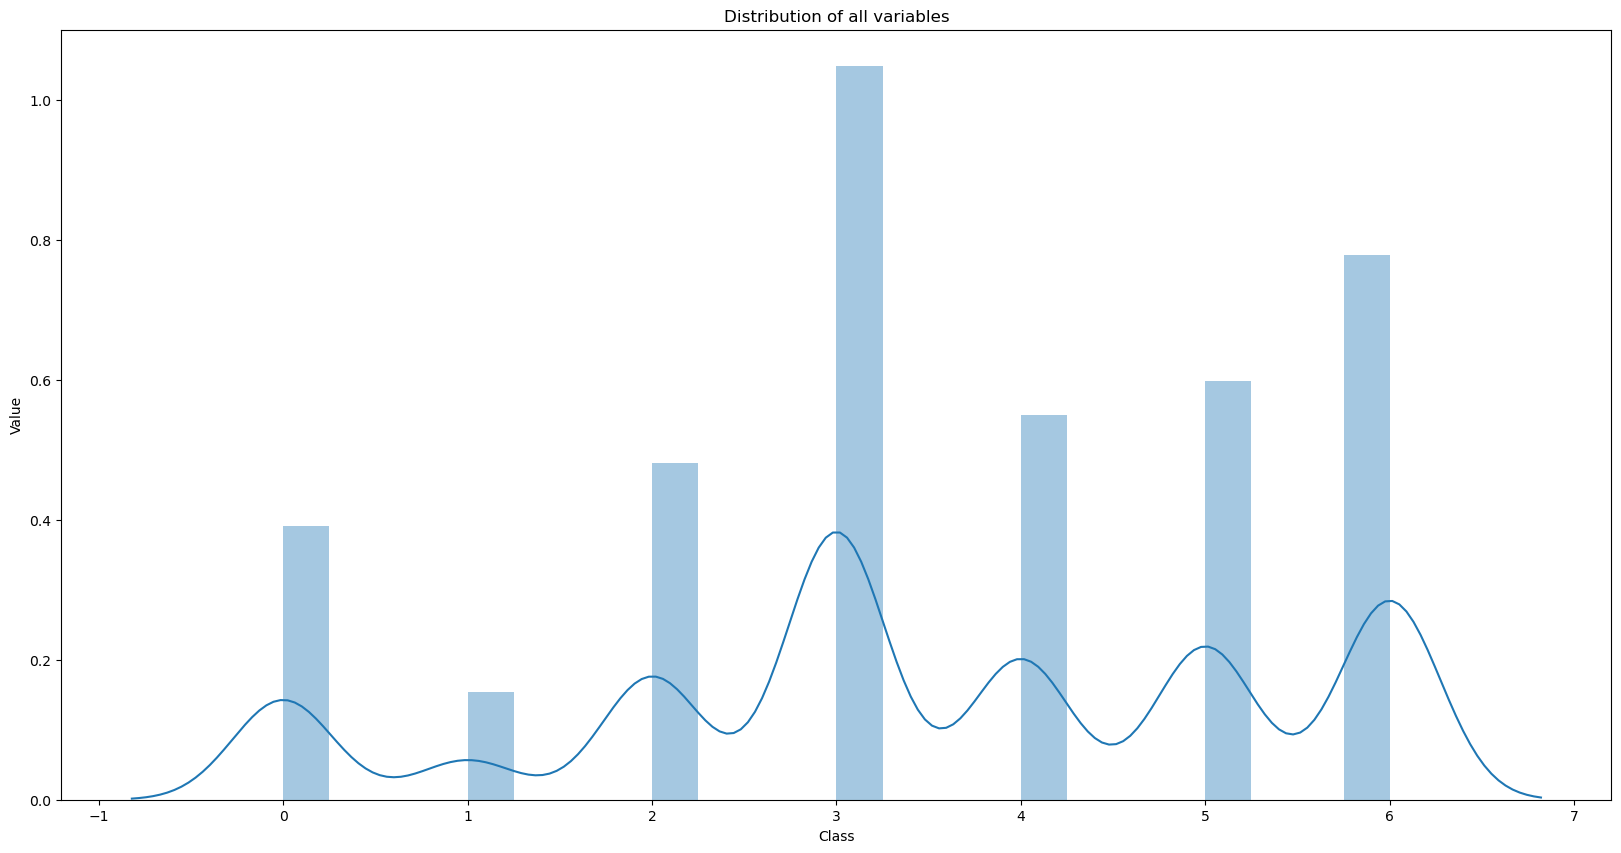

In [14]:
for i in df1.columns:
    plt.figure(figsize=(20,10))
    sb.distplot(df1[i])
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.title('Distribution of all variables')
    plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
Lab = LabelEncoder()
df1['Class'] = Lab.fit_transform(df1['Class'])
df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


# VIF : 

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
A = df1.drop(['Class'],axis=1)
vif = pd.DataFrame()
vif['Columns'] = A.columns
vif['vif'] = [variance_inflation_factor(A.values,i)
           for i in range(len(A.columns))]
vif

,Columns,vif
0,Area,3.443408e+05
1,Perimeter,6.021611e+04
2,MajorAxisLength,1.317358e+06
3,MinorAxisLength,1.652830e+06
4,AspectRation,1.682818e+05
5,Eccentricity,2.341323e+04
6,ConvexArea,3.321269e+05
7,EquivDiameter,6.100438e+06
8,Extent,2.933328e+02
9,Solidity,6.280427e+05


## Correlation Between All Variable : 

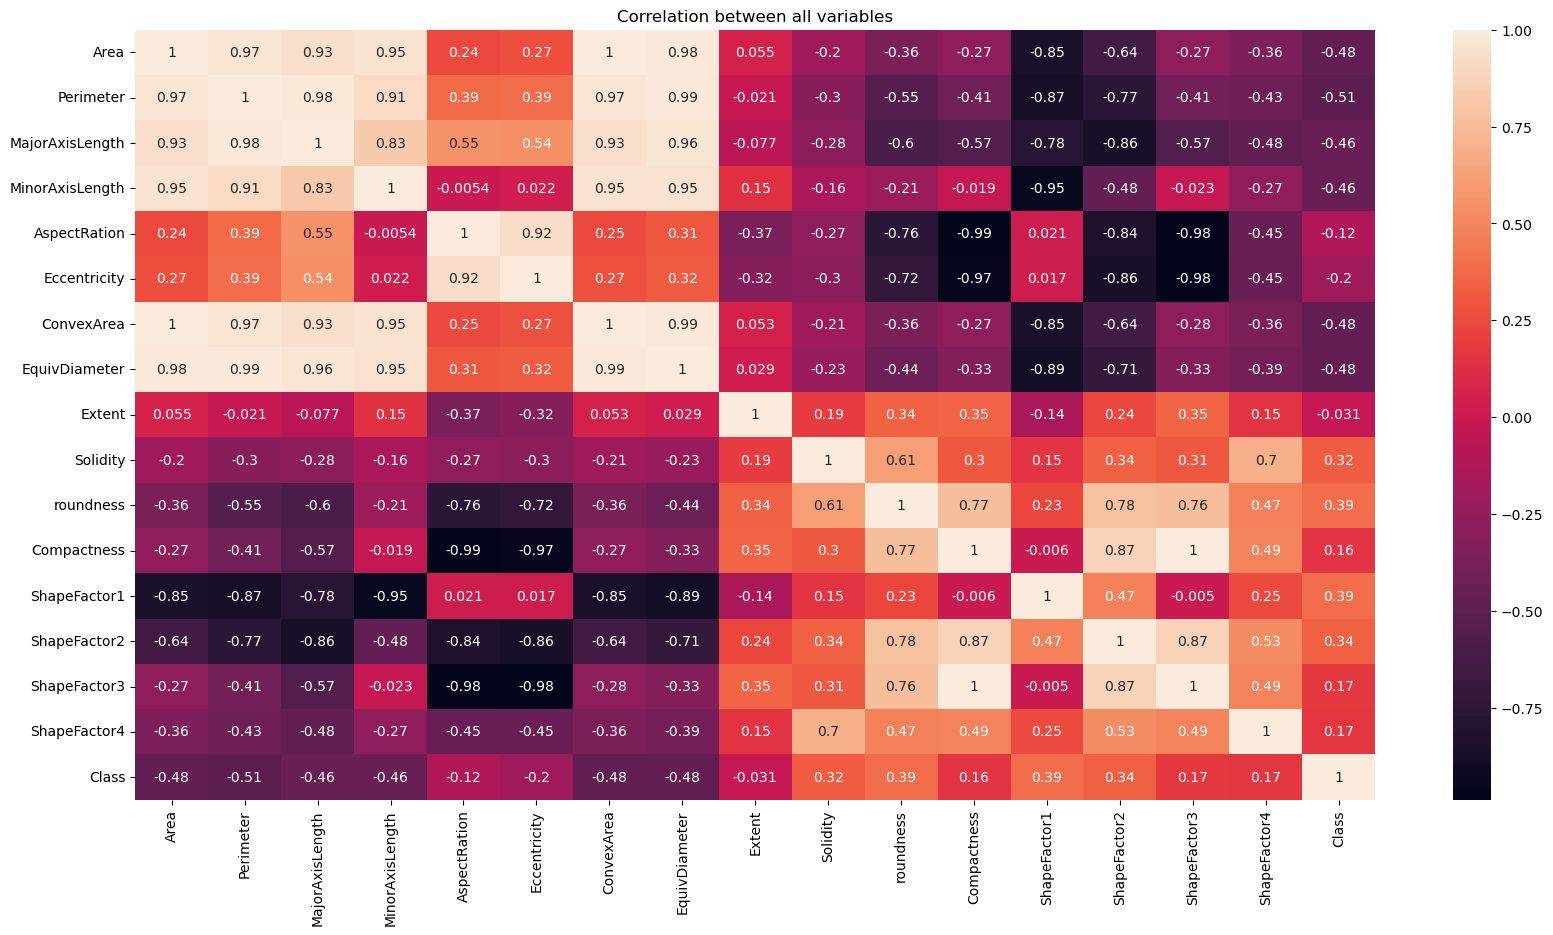

In [18]:
plt.figure(figsize=(20,10))
sb.heatmap(df1.corr(),annot=True)
plt.title('Correlation between all variables')
plt.show()

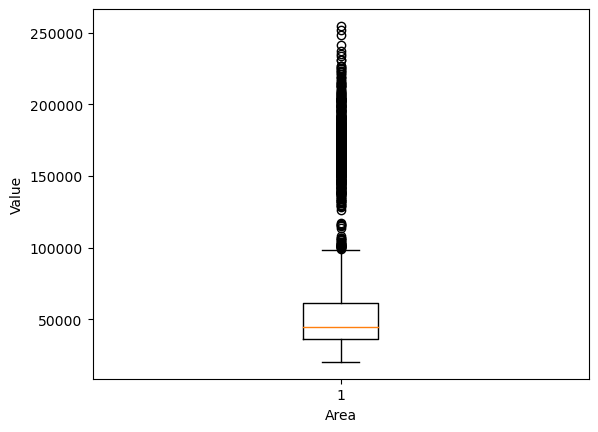

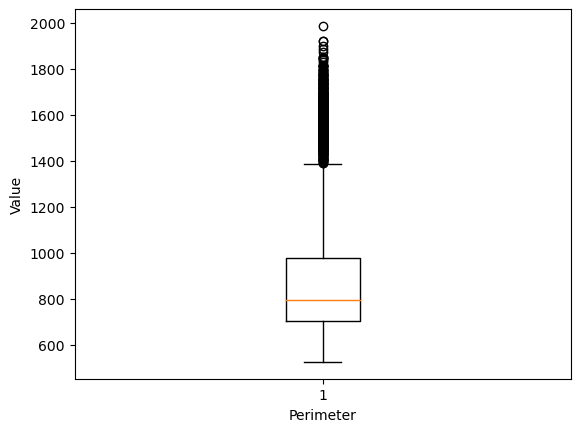

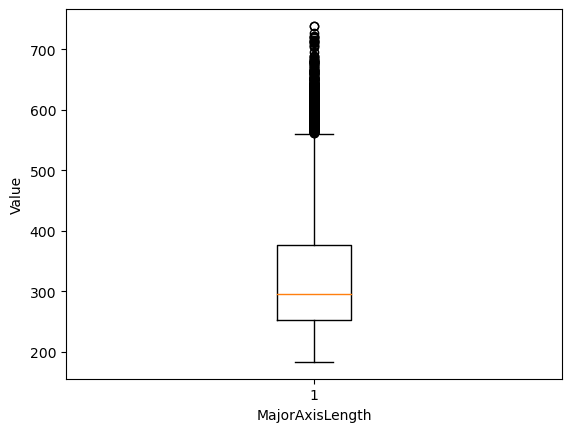

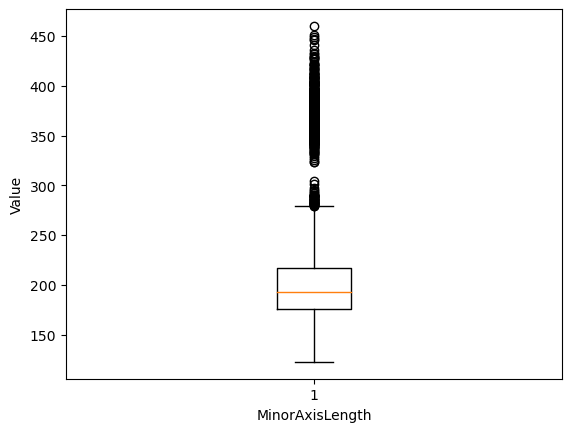

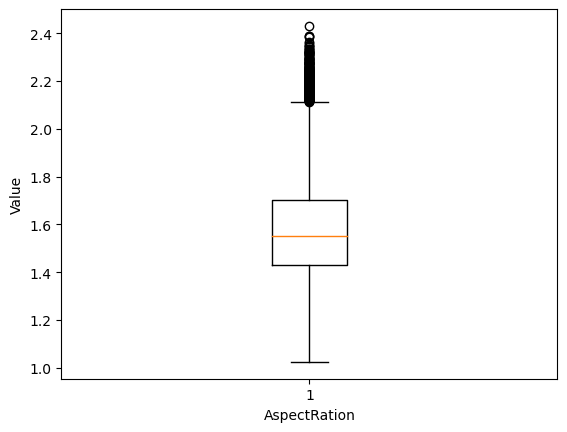

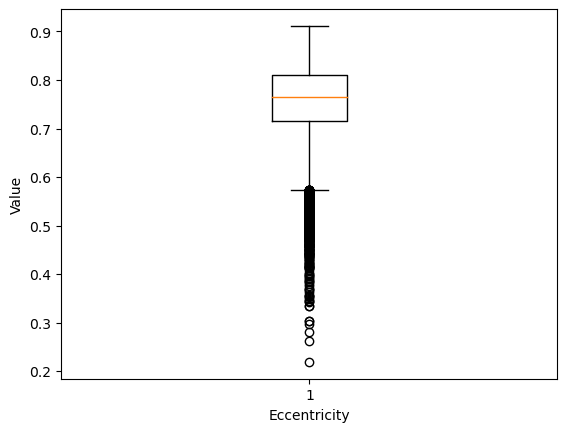

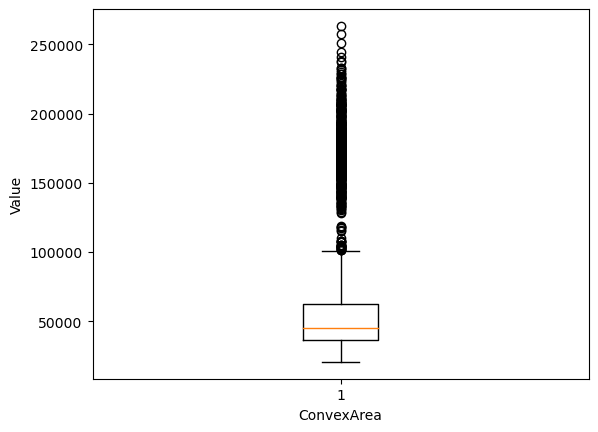

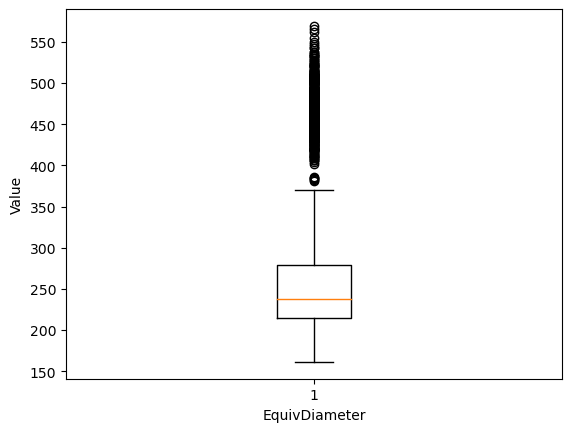

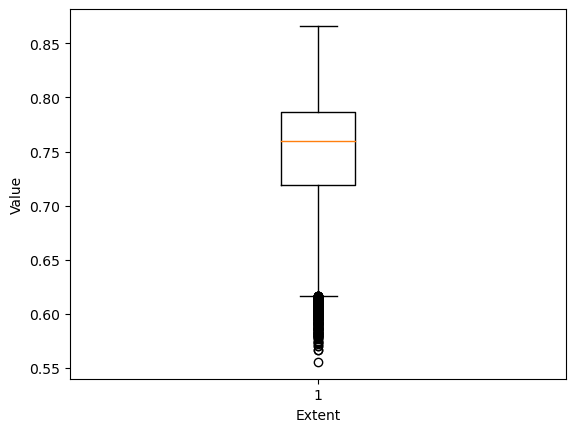

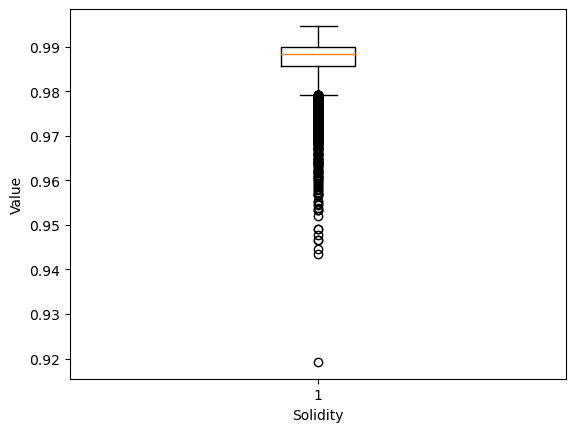

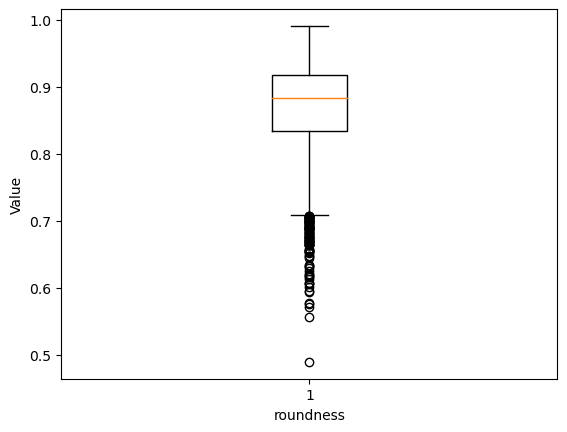

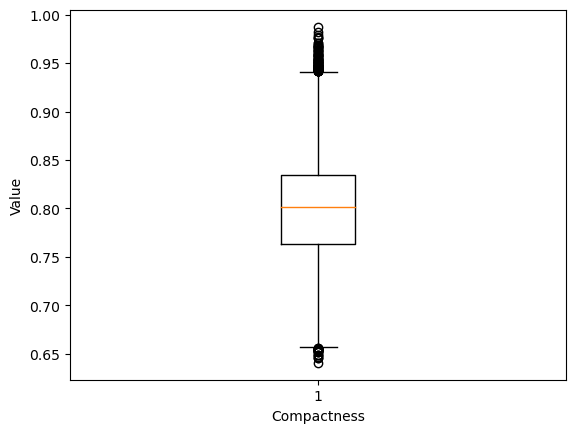

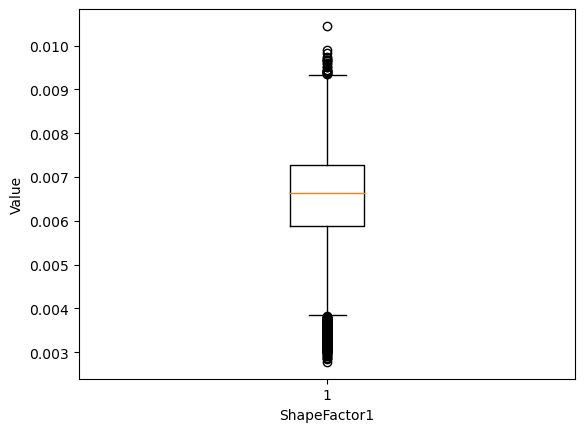

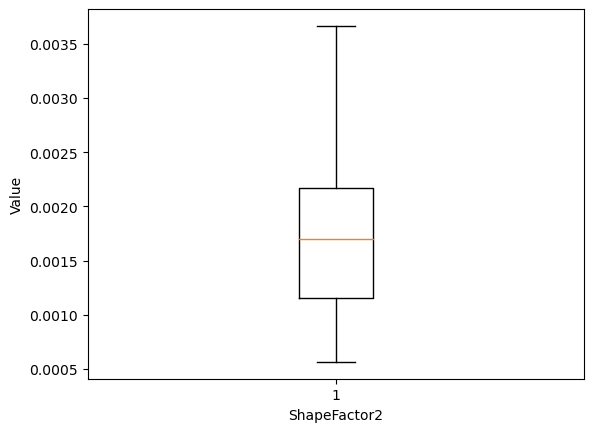

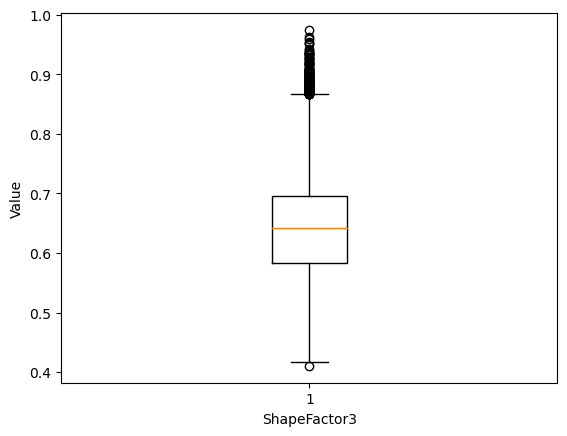

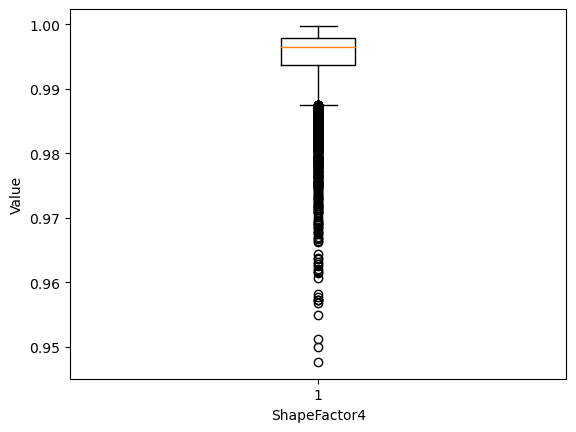

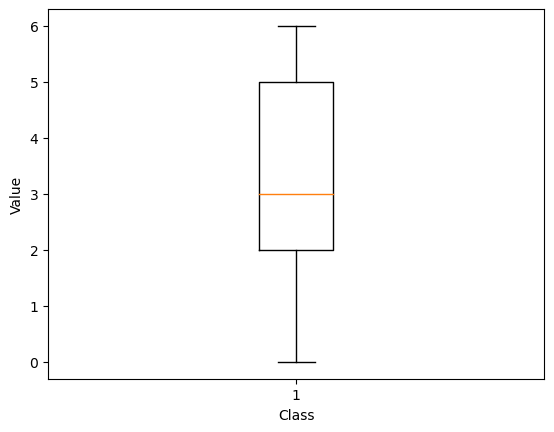

In [19]:
for a in df1.columns:
    plt.boxplot(df1[a])
    plt.xlabel(a)
    plt.ylabel('Value')
    plt.show()

## Outliar (L_Fence & U_Fence) :

In [20]:
Q1 = np.percentile(df1['Area'],25)
Q3 = np.percentile(df1['Area'],75)
IQR = Q3-Q1
L_Fence = Q1-(1.5*IQR)
U_Fence = Q3+(1.5*IQR)

In [21]:
Q11 = np.percentile(df1['Perimeter'],25)
Q31 = np.percentile(df1['Perimeter'],75)
IQR1 = Q31-Q11
L_Fence1 = Q11-(1.5*IQR1)
U_Fence1 = Q31+(1.5*IQR1)

In [22]:
Q12 = np.percentile(df1['MajorAxisLength'],25)
Q32 = np.percentile(df1['MajorAxisLength'],75)
IQR2 = Q32-Q12
L_Fence2 = Q12-(1.5*IQR2)
U_Fence2 = Q32+(1.5*IQR2)

In [23]:
Q13 = np.percentile(df1['MinorAxisLength'],25)
Q33 = np.percentile(df1['MinorAxisLength'],75)
IQR3 = Q33-Q13
L_Fence3 = Q13-(1.5*IQR3)
U_Fence3 = Q33+(1.5*IQR3)

In [24]:
Q14 = np.percentile(df1['AspectRation'],25)
Q34 = np.percentile(df1['AspectRation'],75)
IQR4 = Q34-Q14
L_Fence4 = Q14-(1.5*IQR4)
U_Fence4 = Q34+(1.5*IQR4)

In [25]:
Q15 = np.percentile(df1['Eccentricity'],25)
Q35 = np.percentile(df1['Eccentricity'],75)
IQR5 = Q35-Q15
L_Fence5 = Q15-(1.5*IQR5)
U_Fence5 = Q35+(1.5*IQR5)

In [26]:
Q16 = np.percentile(df1['ConvexArea'],25)
Q36 = np.percentile(df1['ConvexArea'],75)
IQR6 = Q36-Q16
L_Fence6 = Q16-(1.5*IQR6)
U_Fence6 = Q36+(1.5*IQR6)

In [27]:
Q17 = np.percentile(df1['EquivDiameter'],25)
Q37 = np.percentile(df1['EquivDiameter'],75)
IQR7 = Q37-Q17
L_Fence7 = Q17-(1.5*IQR7)
U_Fence7 = Q37+(1.5*IQR7)

In [28]:
Q18 = np.percentile(df1['Extent'],25)
Q38 = np.percentile(df1['Extent'],75)
IQR8 = Q38-Q18
L_Fence8 = Q18-(1.5*IQR8)
U_Fence8 = Q38+(1.5*IQR8)

In [29]:
Q19 = np.percentile(df1['Solidity'],25)
Q39 = np.percentile(df1['Solidity'],75)
IQR9 = Q39-Q19
L_Fence9 = Q19-(1.5*IQR9)
U_Fence9 = Q39+(1.5*IQR9)

In [30]:
Q110 = np.percentile(df1['roundness'],25)
Q310 = np.percentile(df1['roundness'],75)
IQR10 = Q310-Q110
L_Fence10 = Q110-(1.5*IQR10)
U_Fence10 = Q310+(1.5*IQR10)

In [31]:
Q111 = np.percentile(df1['Compactness'],25)
Q311 = np.percentile(df1['Compactness'],75)
IQR11 = Q311-Q111
L_Fence11 = Q111-(1.5*IQR11)
U_Fence11 = Q311+(1.5*IQR11)

In [32]:
Q112 = np.percentile(df1['ShapeFactor1'],25)
Q312 = np.percentile(df1['ShapeFactor1'],75)
IQR12 = Q312-Q112
L_Fence12 = Q112-(1.5*IQR12)
U_Fence12 = Q312+(1.5*IQR12)

In [33]:
Q113 = np.percentile(df1['ShapeFactor3'],25)
Q313 = np.percentile(df1['ShapeFactor3'],75)
IQR13 = Q313-Q113
L_Fence13 = Q113-(1.5*IQR13)
U_Fence13 = Q313+(1.5*IQR13)

In [34]:
Q114 = np.percentile(df1['ShapeFactor4'],25)
Q314 = np.percentile(df1['ShapeFactor4'],75)
IQR14 = Q314-Q114
L_Fence14 = Q114-(1.5*IQR14)
U_Fence14 = Q314+(1.5*IQR14)

## Outliar Remove : 

In [35]:
A = df1.loc[df1['Area']>=L_Fence]
A1 = A.loc[A['Area']<=U_Fence]

In [36]:
B = A1.loc[A1['Perimeter']>=L_Fence1]
B1 = B.loc[B['Perimeter']<=U_Fence1]

In [37]:
C = B1.loc[B1['MajorAxisLength']>=L_Fence2]
C1 = C.loc[C['MajorAxisLength']<=U_Fence2]

In [38]:
D = C1.loc[C1['MinorAxisLength']>=L_Fence3]
D1 = D.loc[D['MinorAxisLength']<=U_Fence3]

In [39]:
E = D1.loc[D1['AspectRation']>=L_Fence4]
E1 = E.loc[E['AspectRation']<=U_Fence4]

In [40]:
F = E1.loc[E1['Eccentricity']>=L_Fence5]
F1 = F.loc[F['Eccentricity']<=U_Fence5]

In [41]:
G = F1.loc[F1['ConvexArea']>=L_Fence6]
G1 = G.loc[G['ConvexArea']<=U_Fence6]

In [42]:
H = G1.loc[G1['EquivDiameter']>=L_Fence7]
H1 = H.loc[H['EquivDiameter']<=U_Fence7]

In [43]:
I = H1.loc[H1['Extent']>=L_Fence8]
I1 = I.loc[I['Extent']<=U_Fence8]

In [44]:
J = I1.loc[I1['Solidity']>=L_Fence9]
J1 = J.loc[J['Solidity']<=U_Fence9]

In [45]:
K = J1.loc[J1['roundness']>=L_Fence10]
K1 = K.loc[K['roundness']<=U_Fence10]

In [46]:
L = K1.loc[K1['Compactness']>=L_Fence11]
L1 = L.loc[L['Compactness']<=U_Fence11]

In [47]:
M = L1.loc[L1['ShapeFactor1']>=L_Fence12]
M1 = M.loc[M['ShapeFactor1']<=U_Fence12]

In [48]:
N = M1.loc[M1['ShapeFactor3']>=L_Fence13]
N1 = N.loc[N['ShapeFactor3']<=U_Fence13]

In [49]:
O = N1.loc[N1['ShapeFactor4']>=L_Fence14]
Data = O.loc[O['ShapeFactor4']<=U_Fence14]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


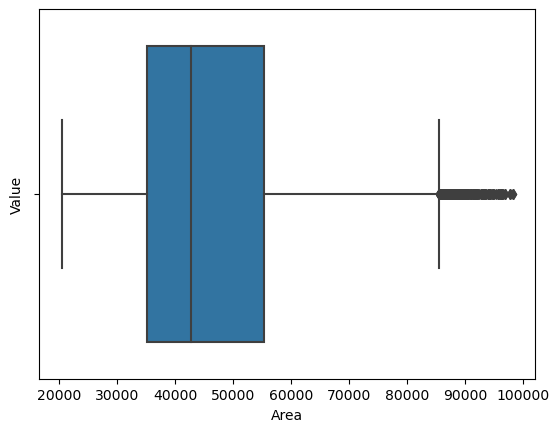

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


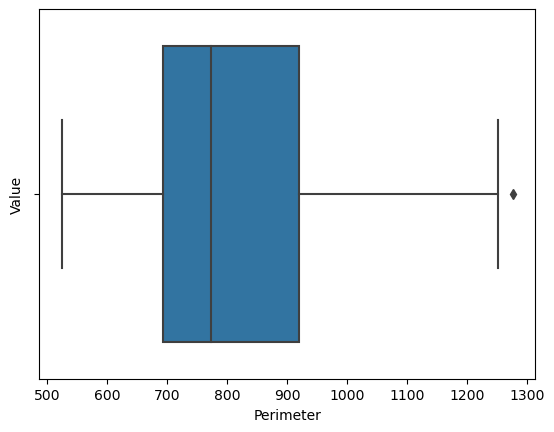

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


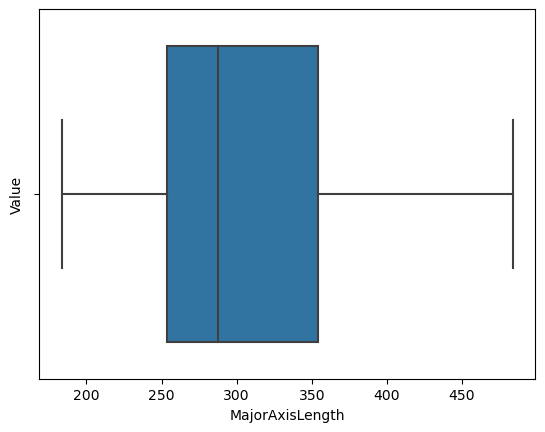

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


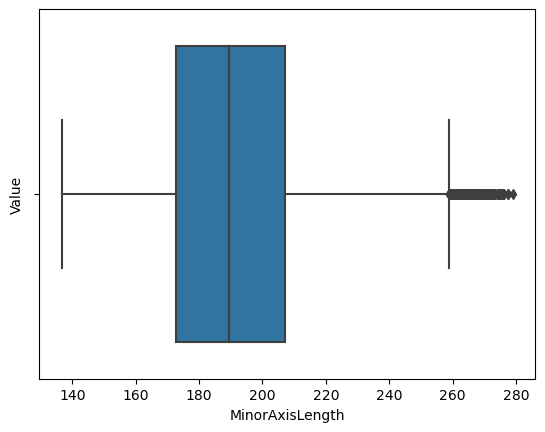

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


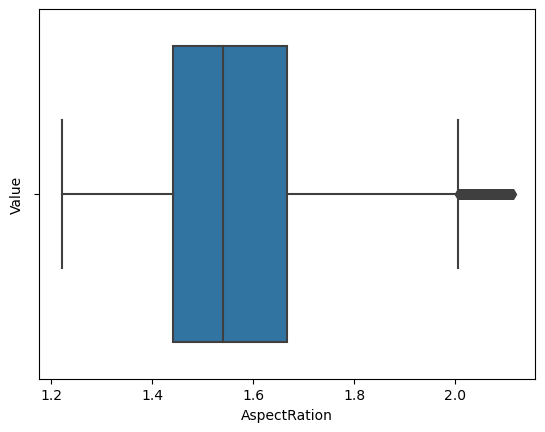

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


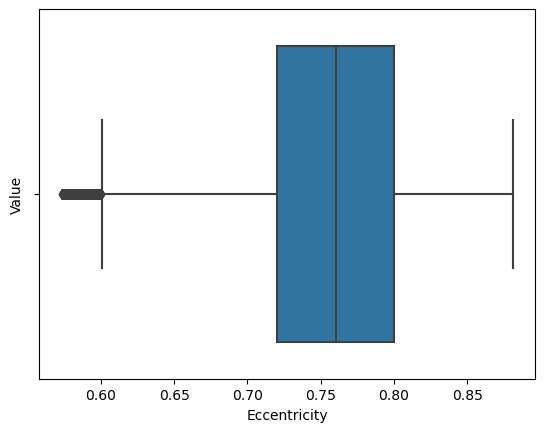

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


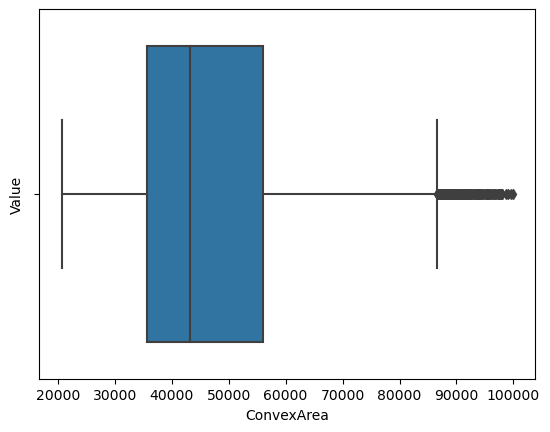

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


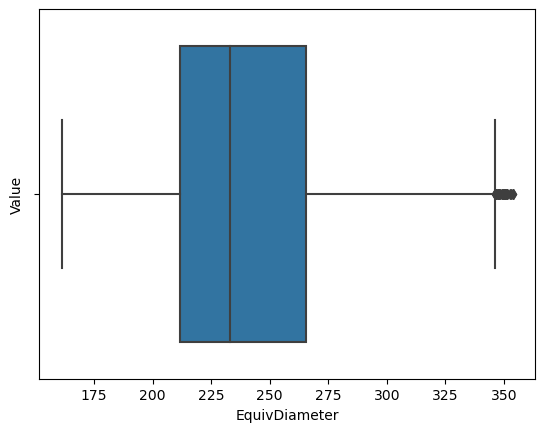

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


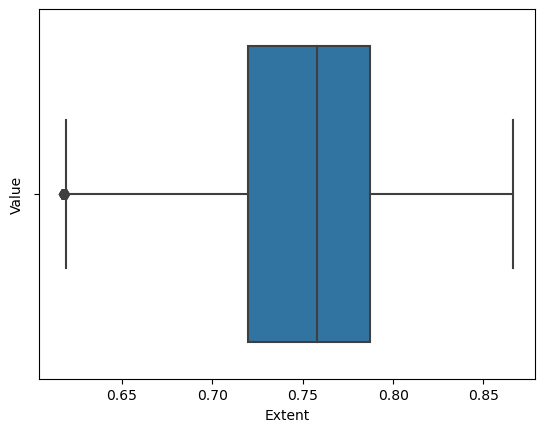

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


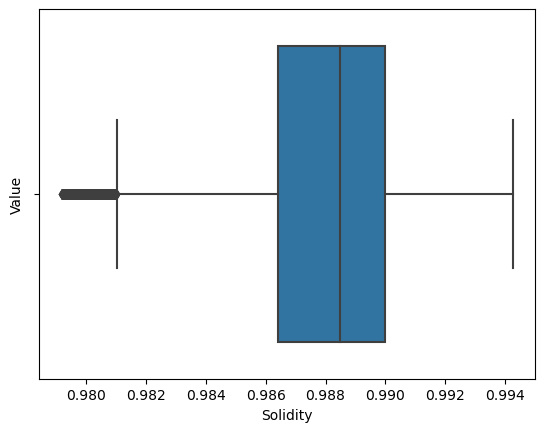

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


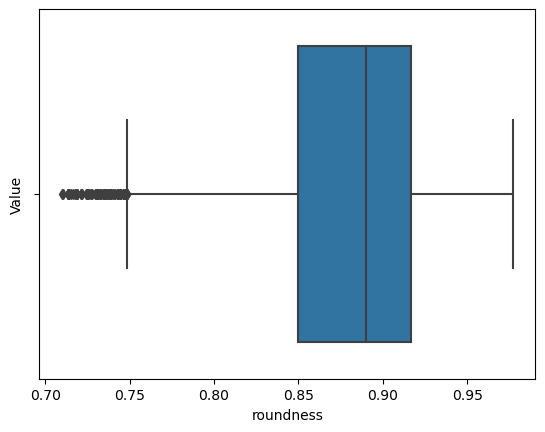

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


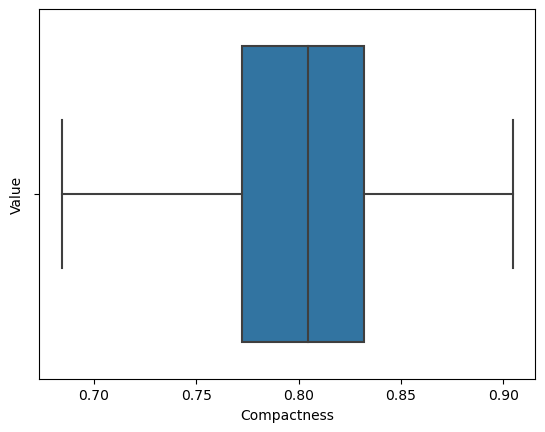

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


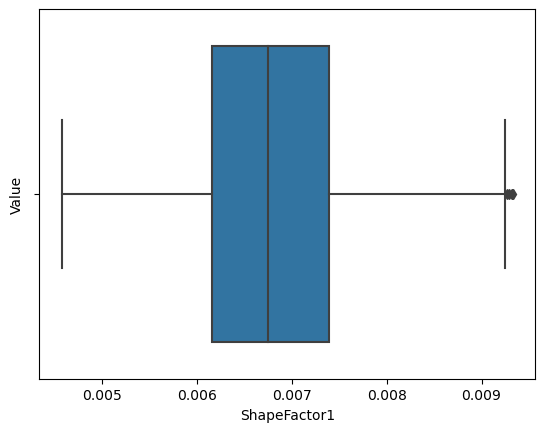

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


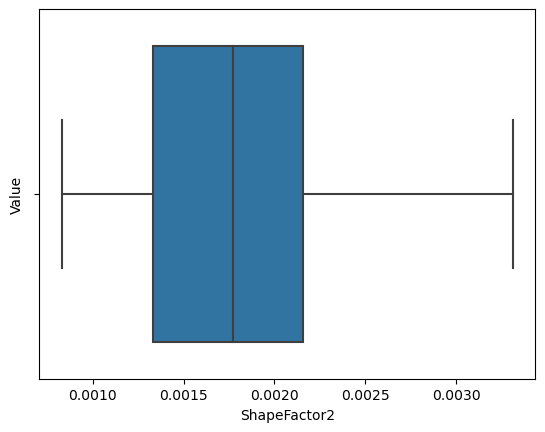

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


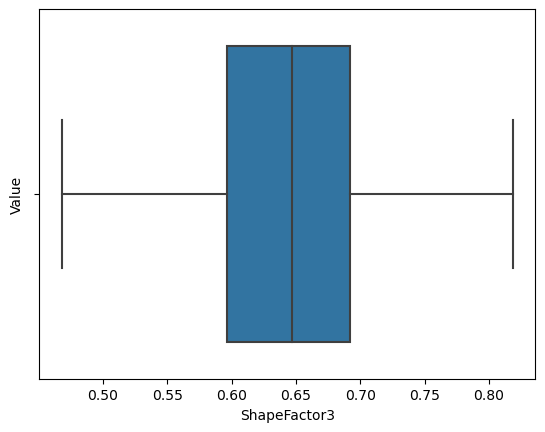

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


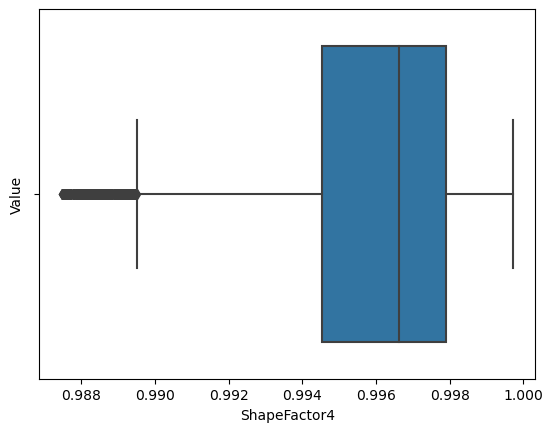

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


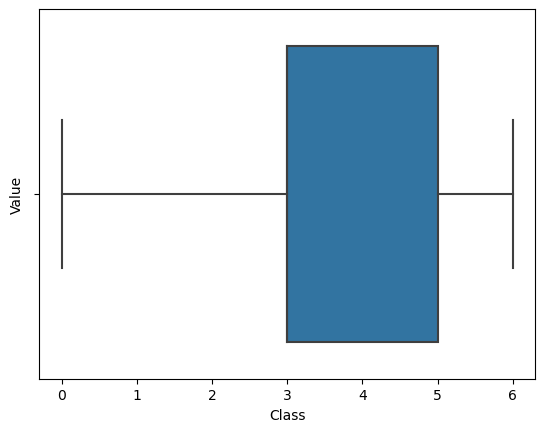

In [50]:
for b in Data.columns:
    sb.boxplot(Data[b])
    plt.xlabel(b)
    plt.ylabel('Value')
    plt.show()

In [51]:
Data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
23,31637,656.711,229.719255,175.510446,1.308864,0.645191,32045,200.702465,0.761823,0.987268,0.921842,0.873686,0.007261,0.002610,0.763327,0.999091,5
24,31675,657.431,236.752632,171.210559,1.382816,0.690678,32009,200.822963,0.740936,0.989565,0.920929,0.848240,0.007474,0.002387,0.719510,0.994950,5
29,31811,642.092,223.984683,180.917123,1.238051,0.589565,32052,201.253629,0.773877,0.992481,0.969600,0.898515,0.007041,0.002831,0.807329,0.999515,5
31,31823,662.532,222.872689,181.894696,1.225284,0.577858,32274,201.291585,0.774848,0.986026,0.911040,0.903168,0.007004,0.002875,0.815713,0.999481,5
32,31837,656.404,224.912554,180.439422,1.246471,0.596968,32238,201.335857,0.785246,0.987561,0.928538,0.895174,0.007065,0.002798,0.801336,0.998843,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [52]:
X = Data.drop(['Class'],axis=1)
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
23,31637,656.711,229.719255,175.510446,1.308864,0.645191,32045,200.702465,0.761823,0.987268,0.921842,0.873686,0.007261,0.002610,0.763327,0.999091
24,31675,657.431,236.752632,171.210559,1.382816,0.690678,32009,200.822963,0.740936,0.989565,0.920929,0.848240,0.007474,0.002387,0.719510,0.994950
29,31811,642.092,223.984683,180.917123,1.238051,0.589565,32052,201.253629,0.773877,0.992481,0.969600,0.898515,0.007041,0.002831,0.807329,0.999515
31,31823,662.532,222.872689,181.894696,1.225284,0.577858,32274,201.291585,0.774848,0.986026,0.911040,0.903168,0.007004,0.002875,0.815713,0.999481
32,31837,656.404,224.912554,180.439422,1.246471,0.596968,32238,201.335857,0.785246,0.987561,0.928538,0.895174,0.007065,0.002798,0.801336,0.998843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [53]:
Y = Data['Class']
Y

23       5
24       5
29       5
31       5
32       5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 10539, dtype: int64

In [54]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [55]:
from collections import Counter

In [56]:
from imblearn.over_sampling import SMOTEN
Smoten = SMOTEN()
Xr,Yr = Smoten.fit_resample(X,Y)

In [57]:
Xr.shape

(20778, 16)

In [58]:
Yr.shape

(20778,)

In [59]:
print('Actual {}'.format(Counter(Y)))
print('Resample {}'.format(Counter(Yr)))

Actual Counter({3: 3463, 6: 2582, 2: 1222, 5: 1197, 0: 1066, 4: 1009})
Resample Counter({5: 3463, 0: 3463, 2: 3463, 4: 3463, 6: 3463, 3: 3463})


In [60]:
Yr.value_counts()

5    3463
0    3463
2    3463
4    3463
6    3463
3    3463
Name: Class, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

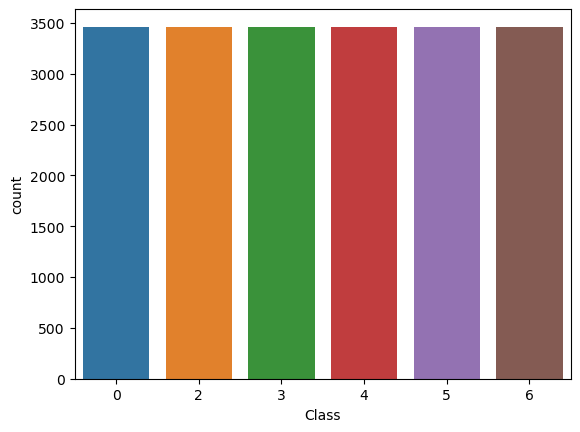

In [61]:
sb.countplot(Yr)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


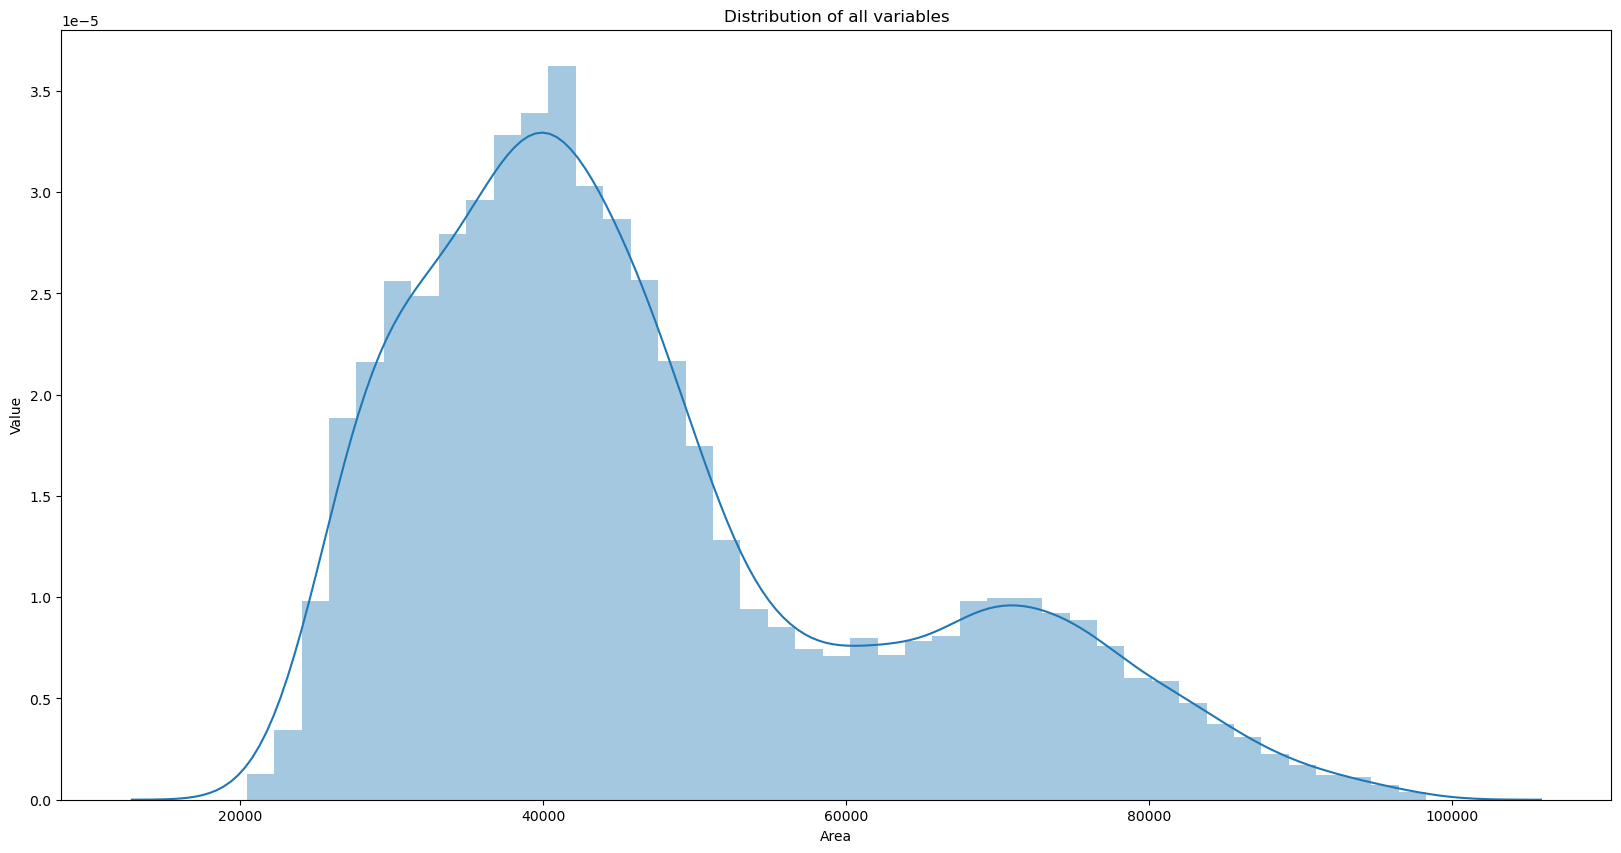

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


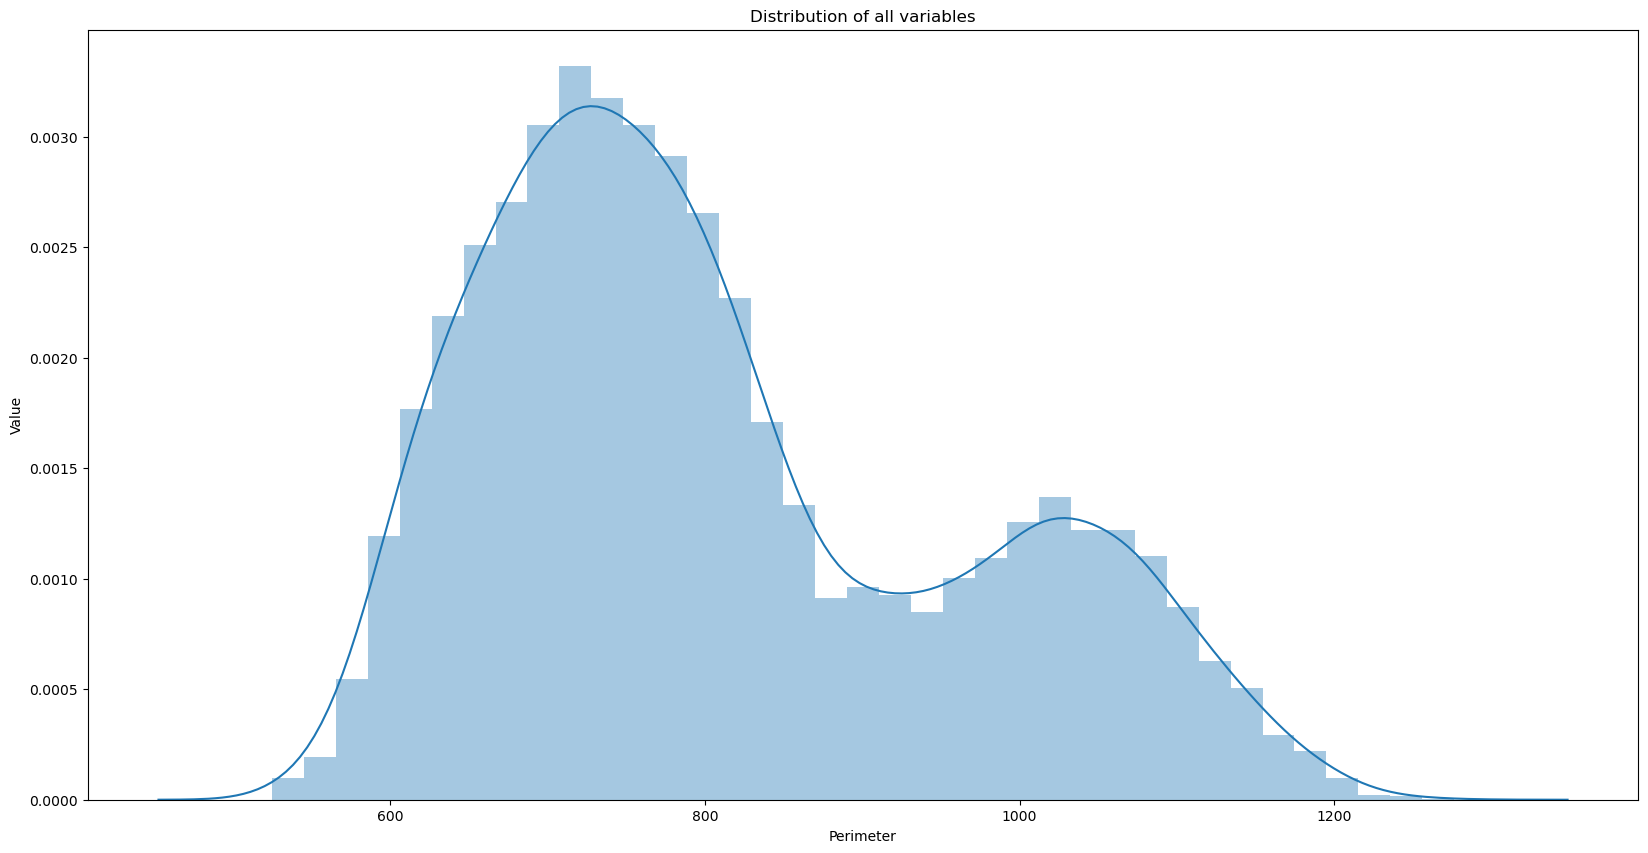

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


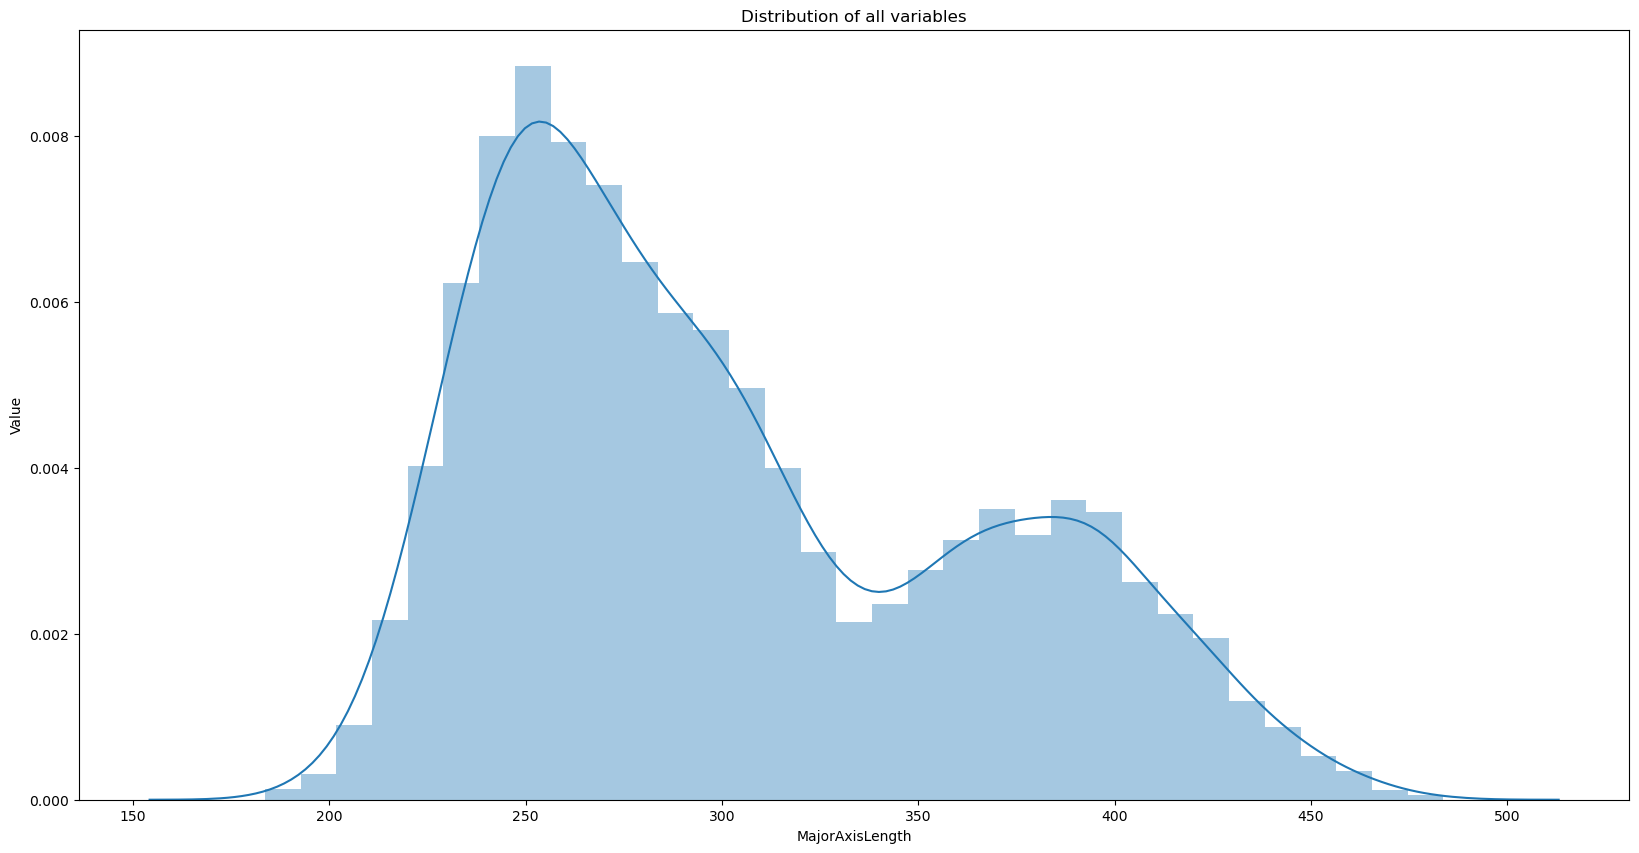

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


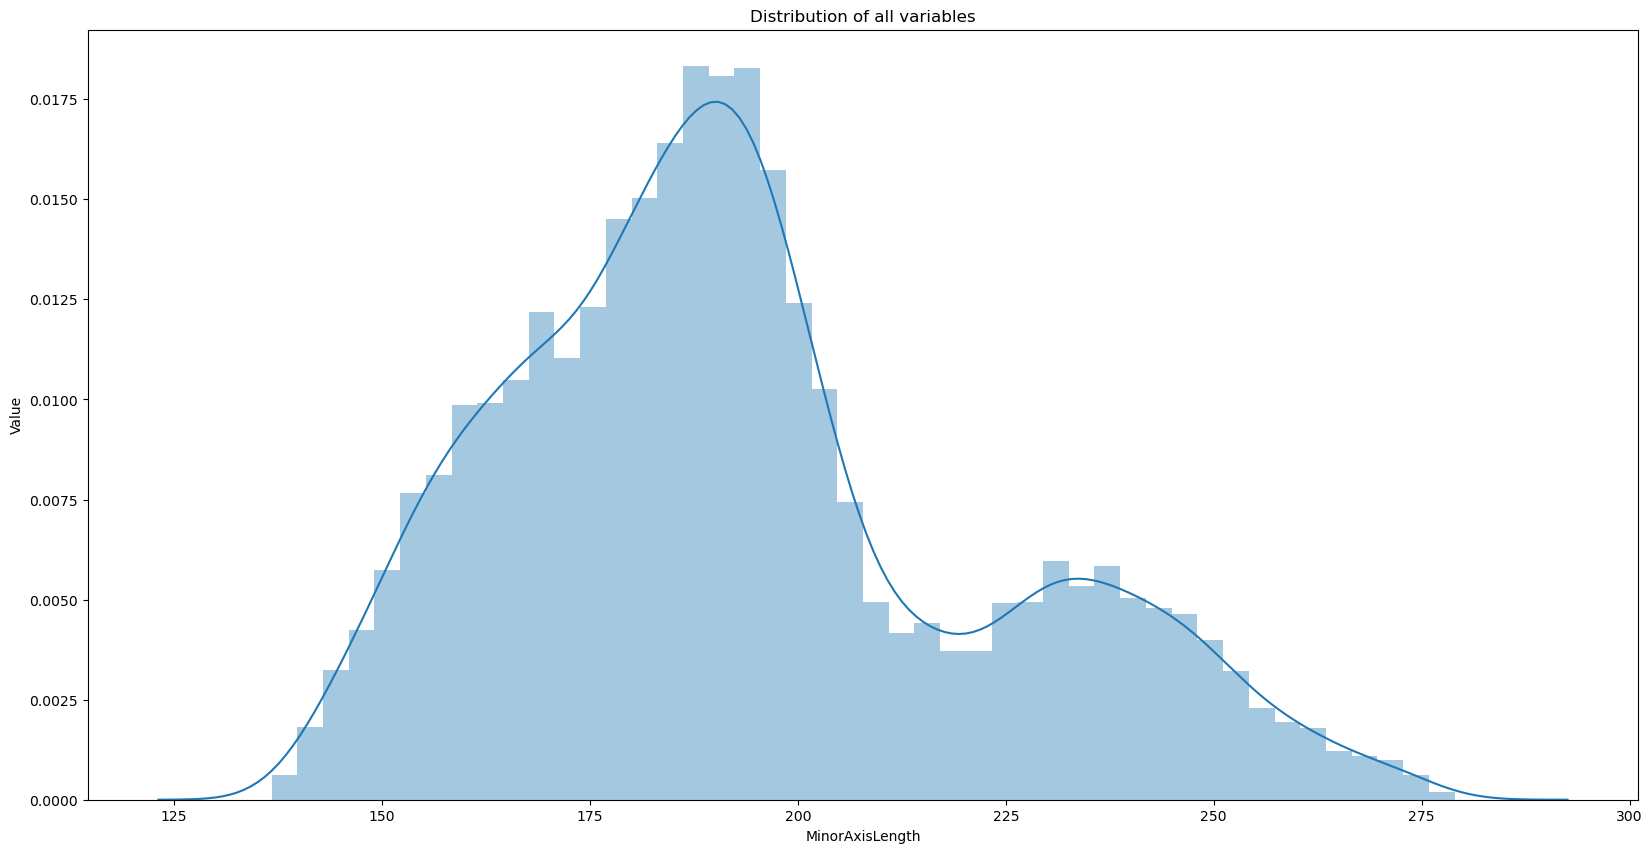

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


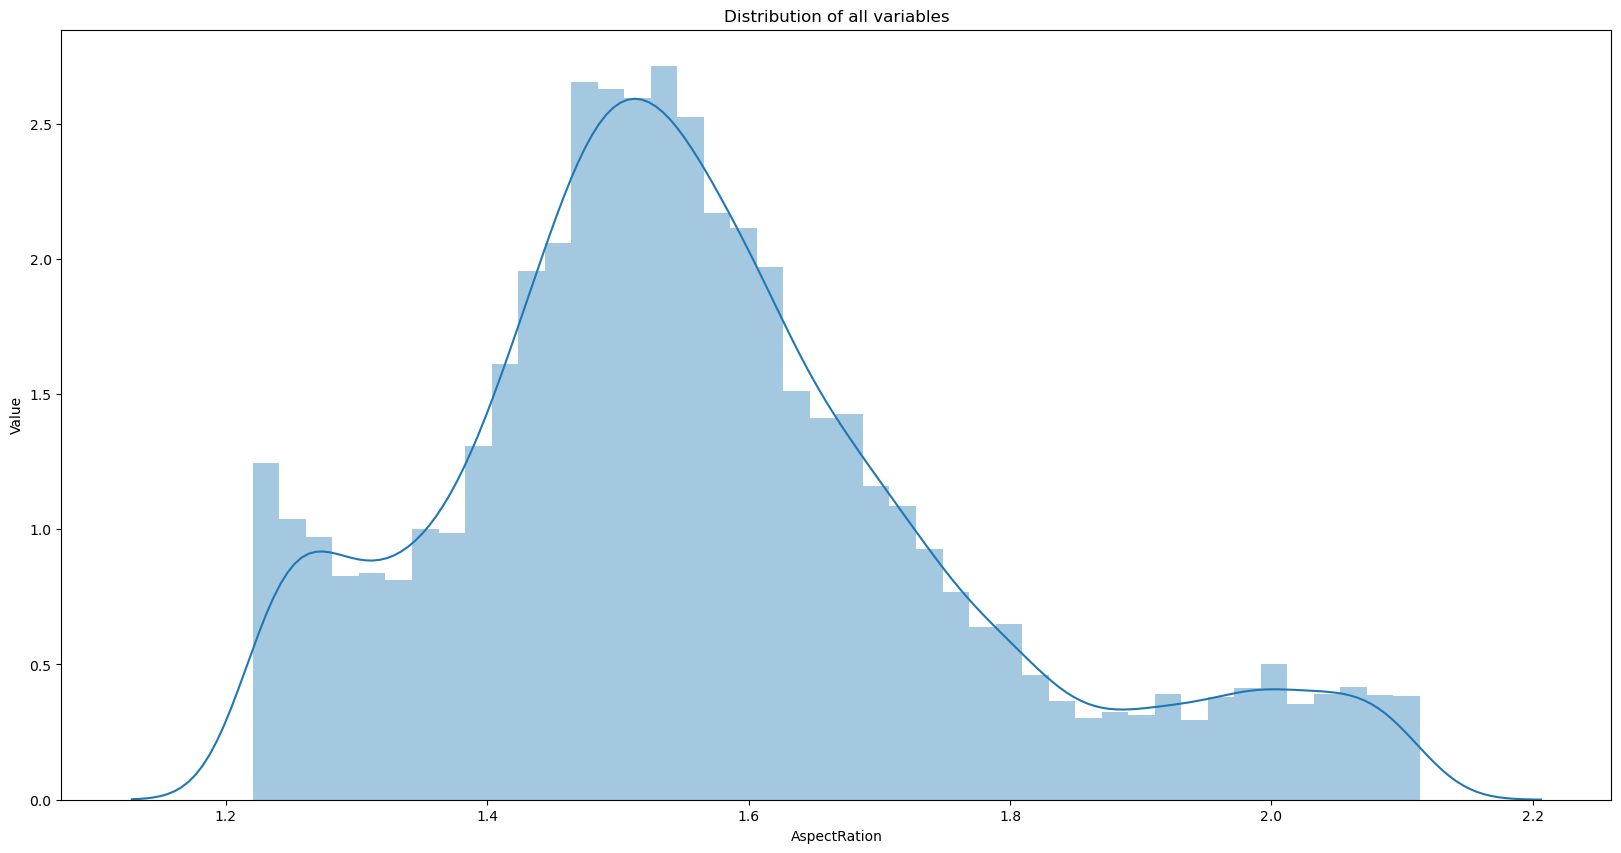

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


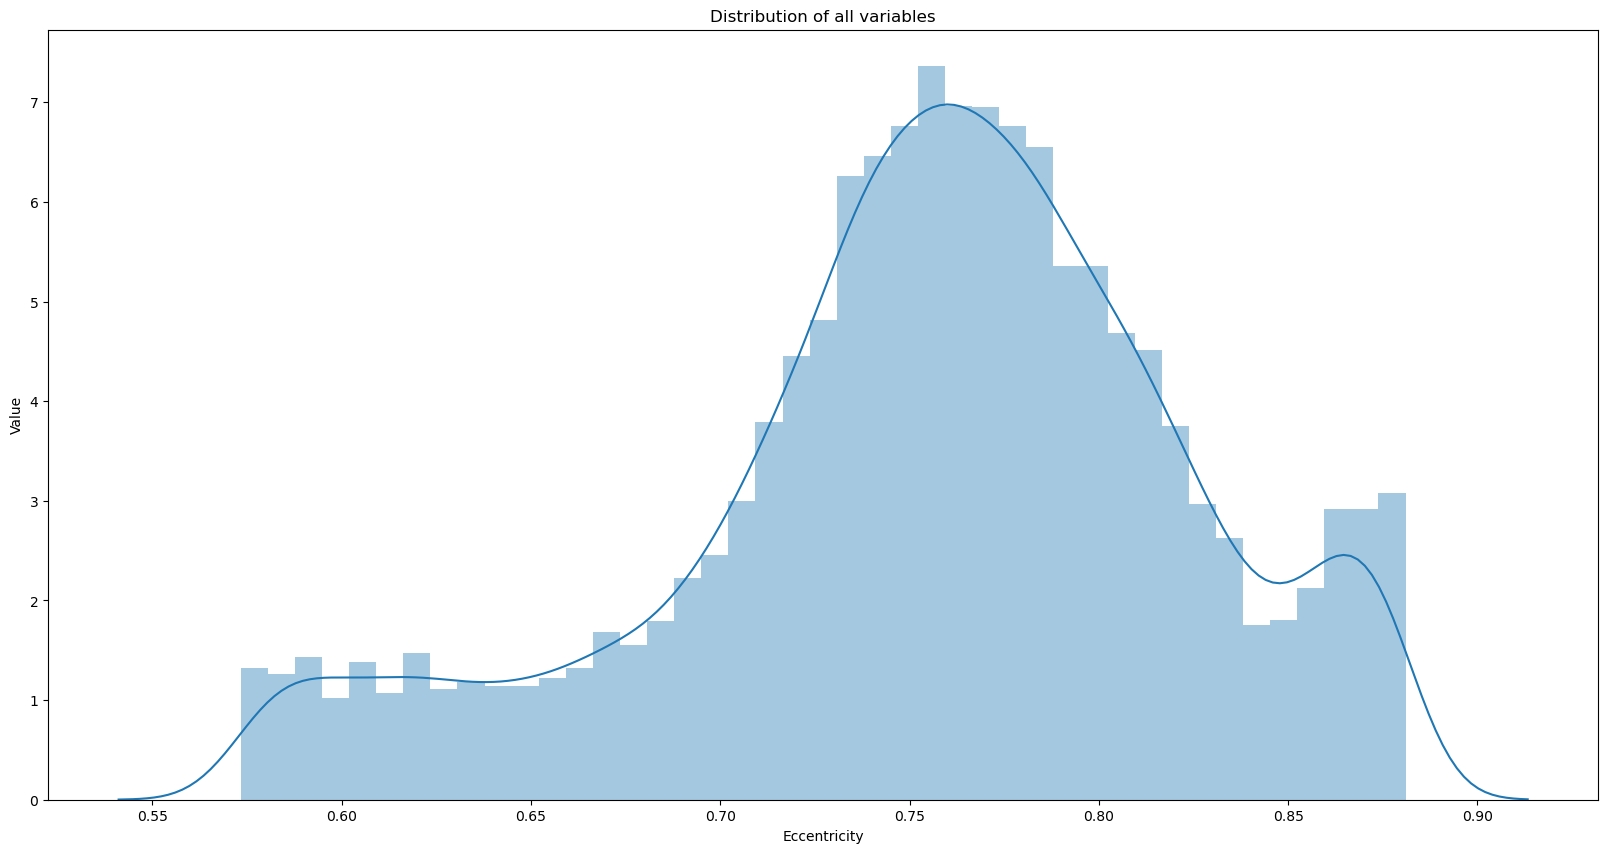

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


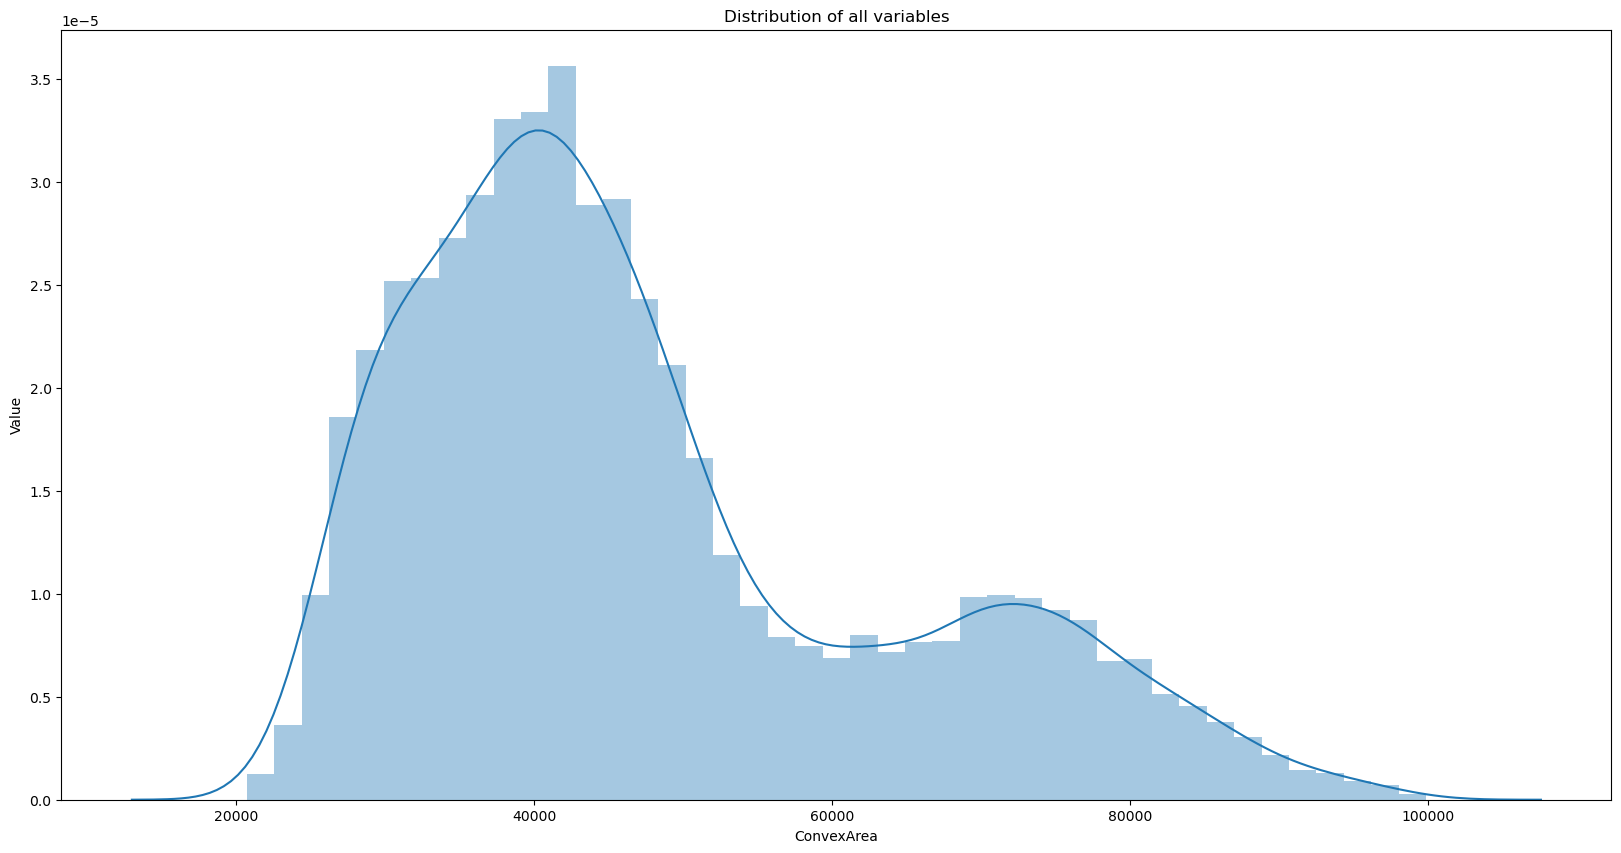

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


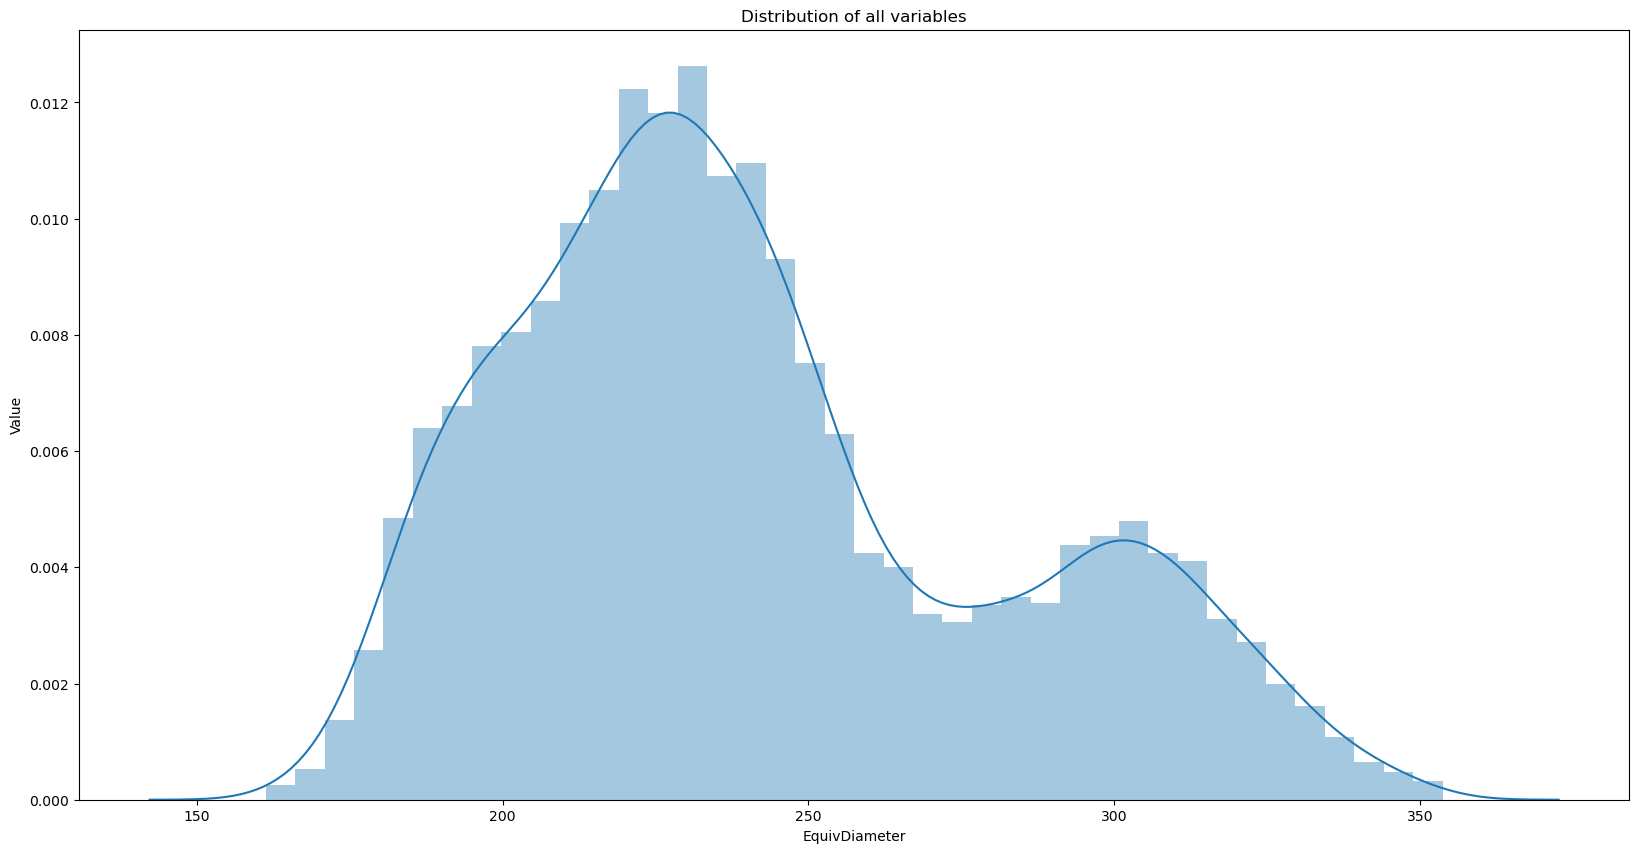

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


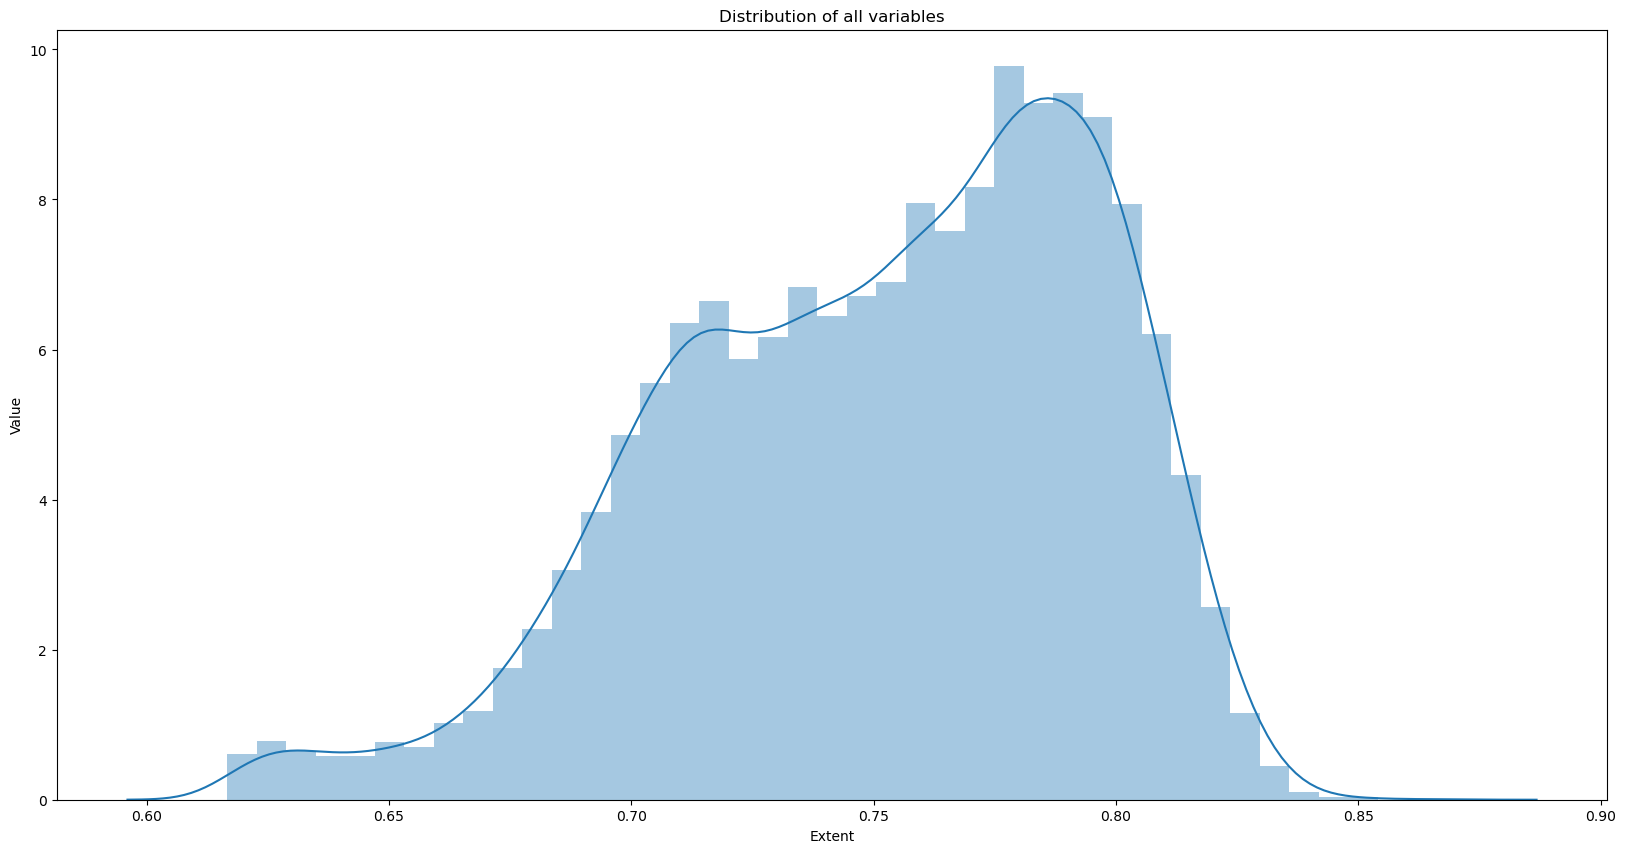

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


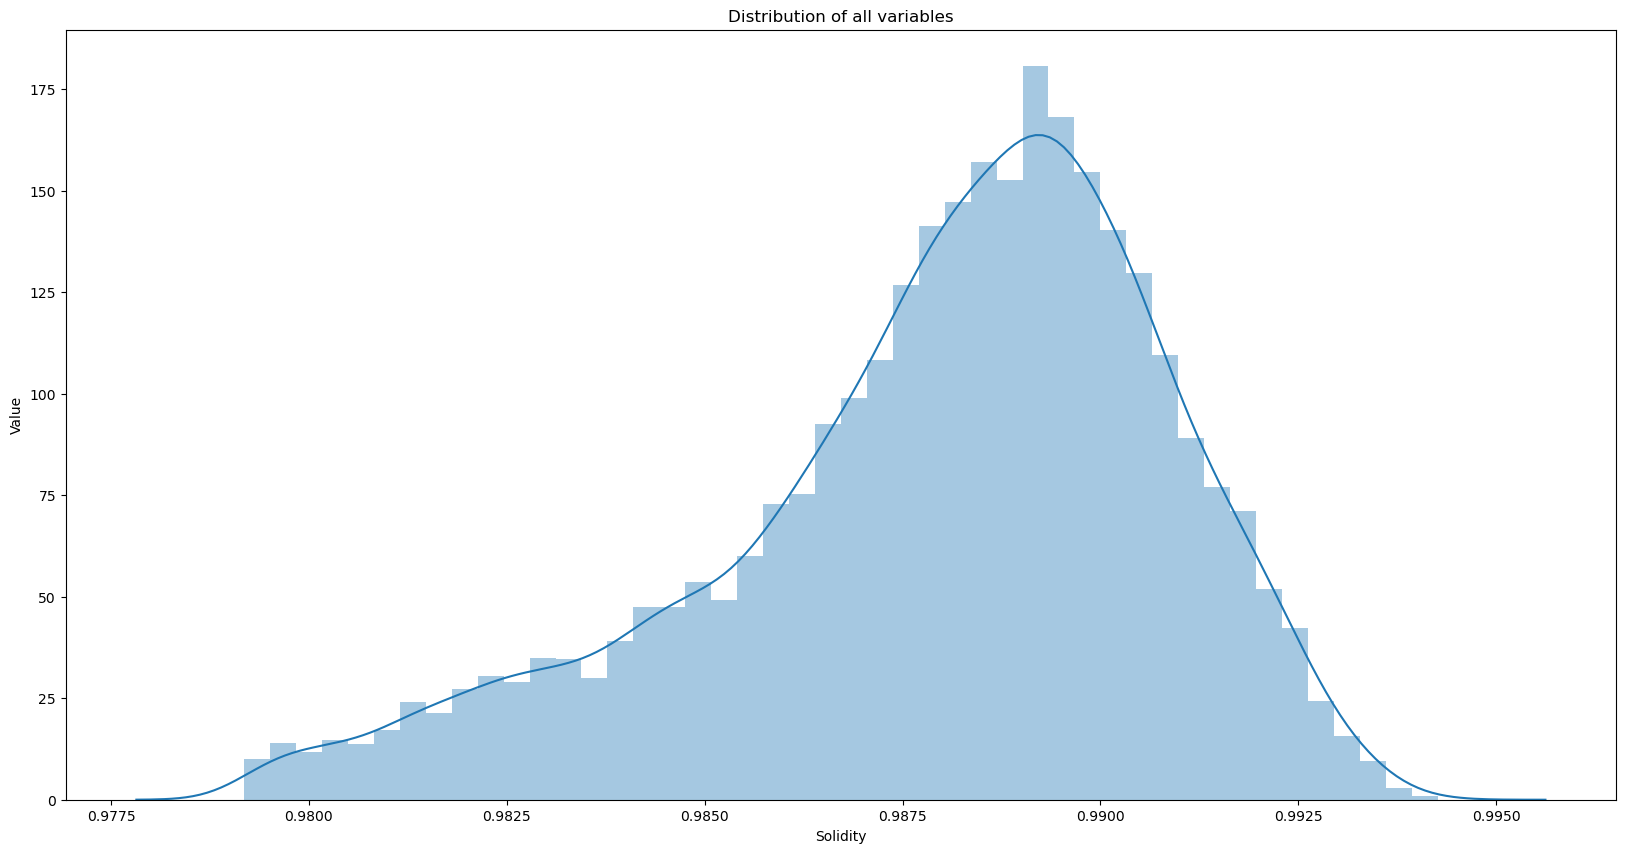

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


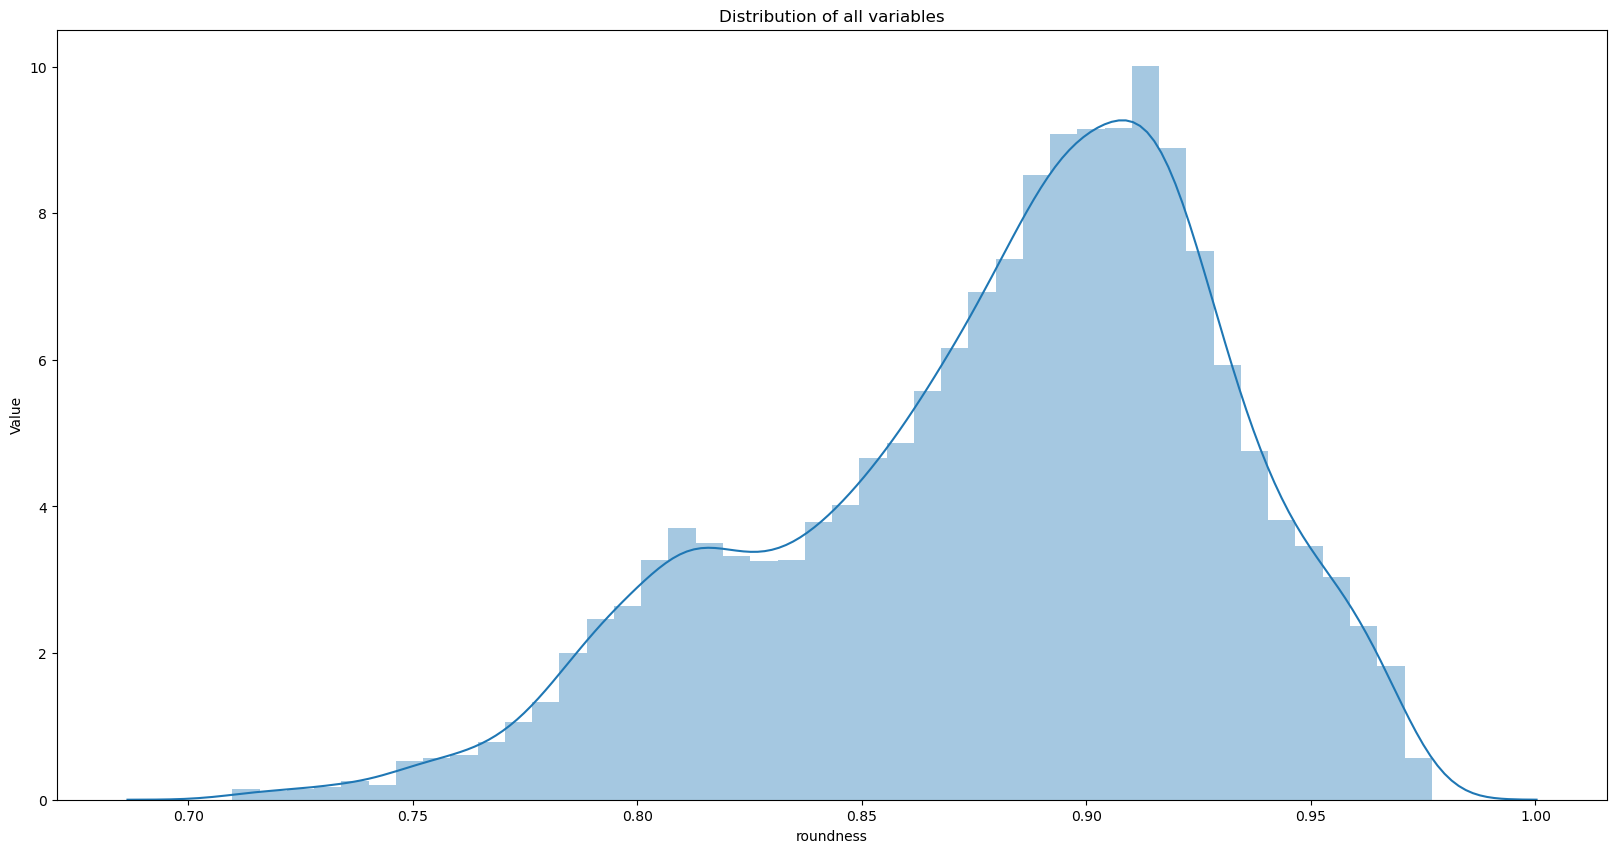

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


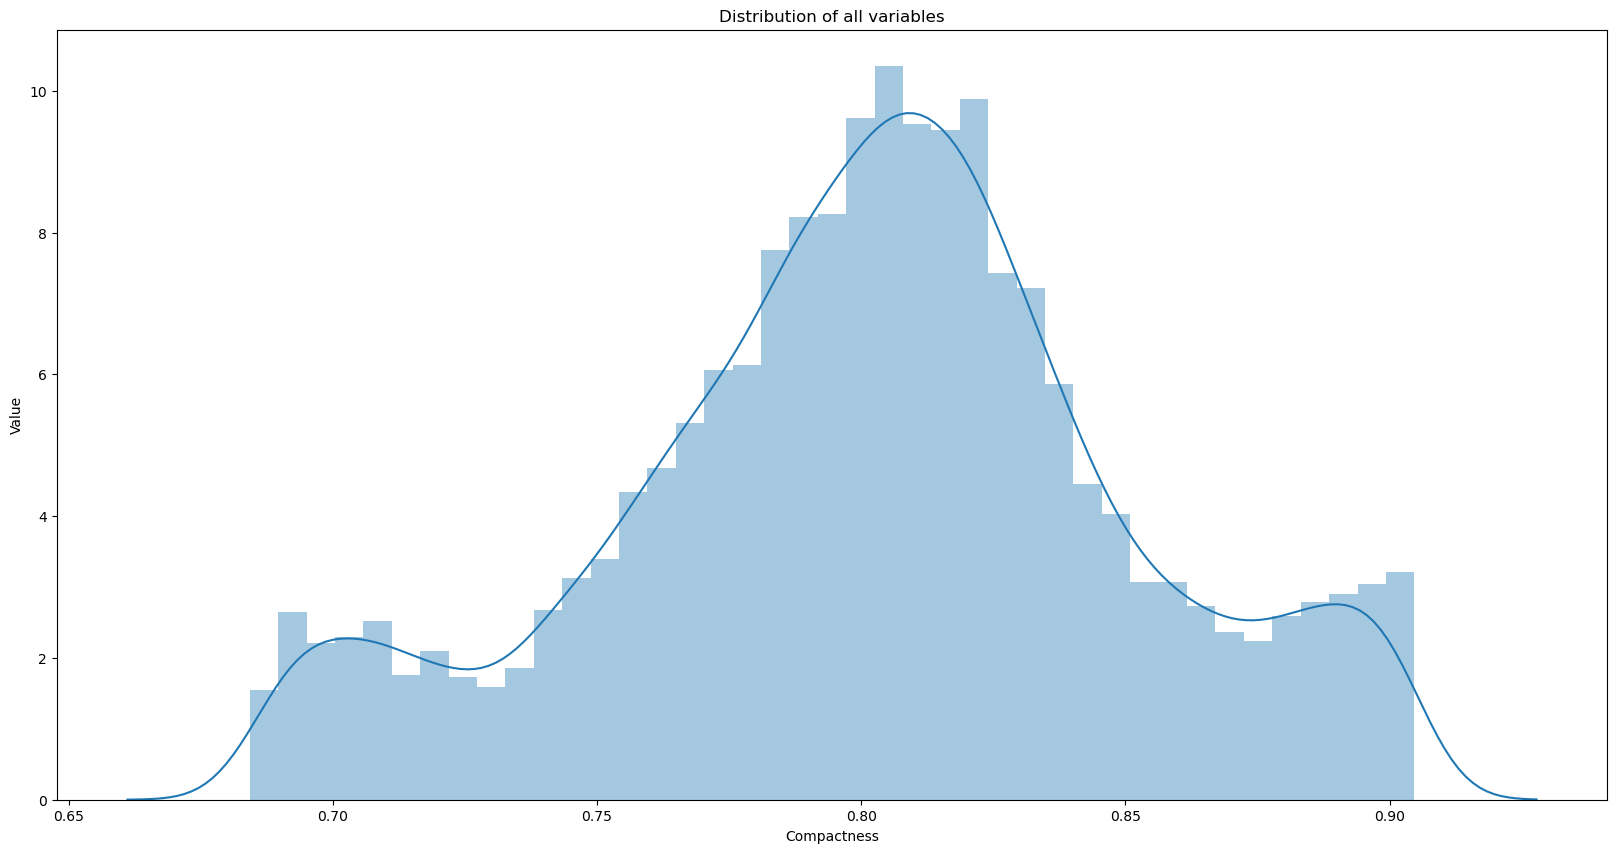

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


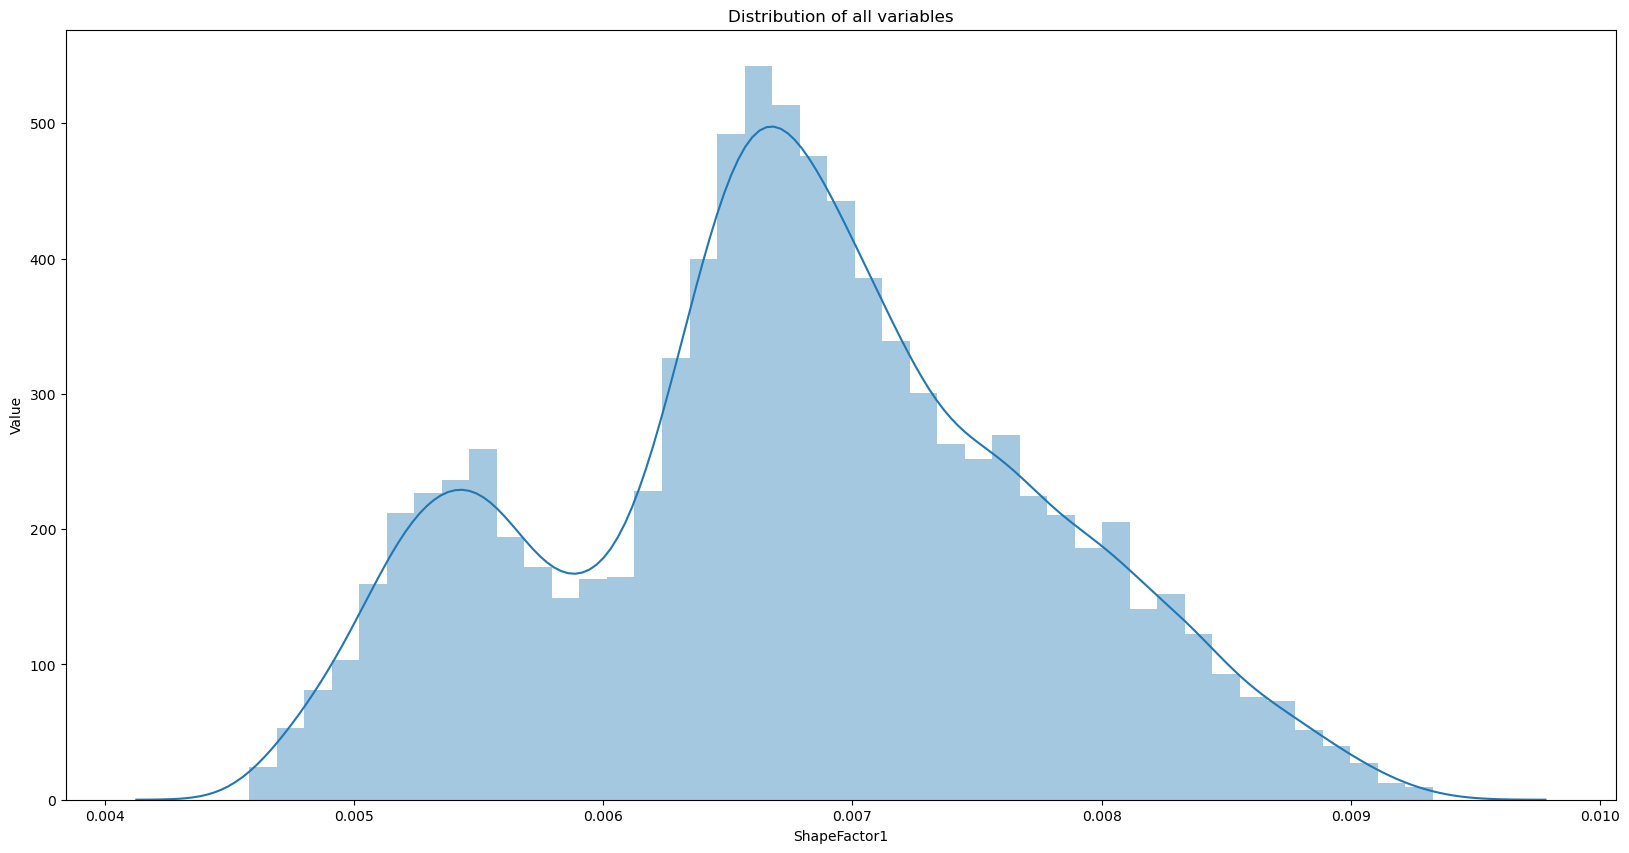

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


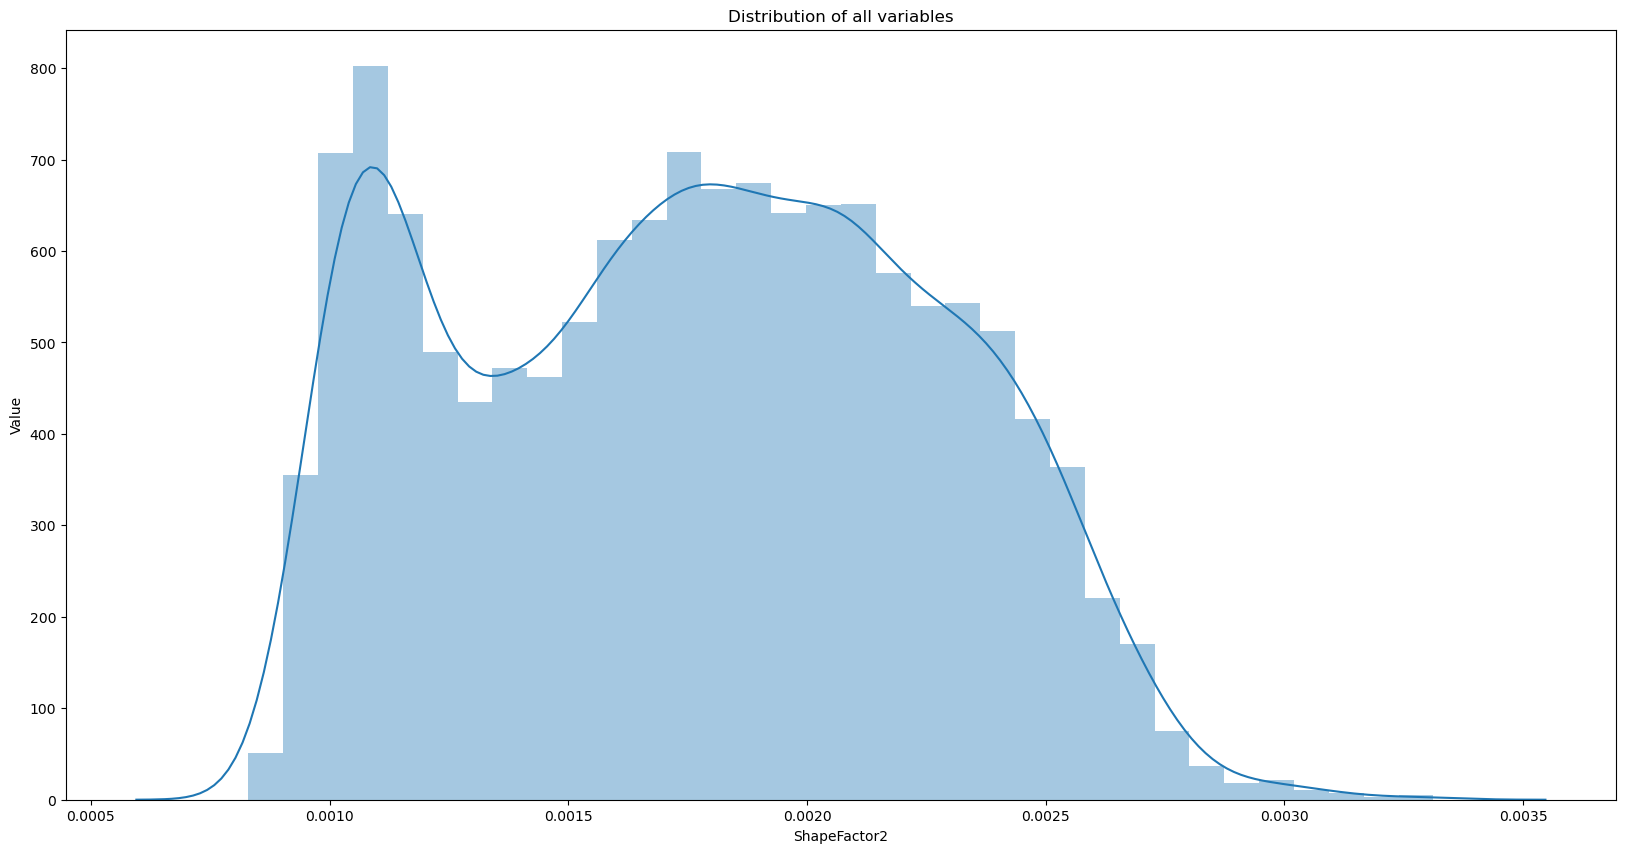

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


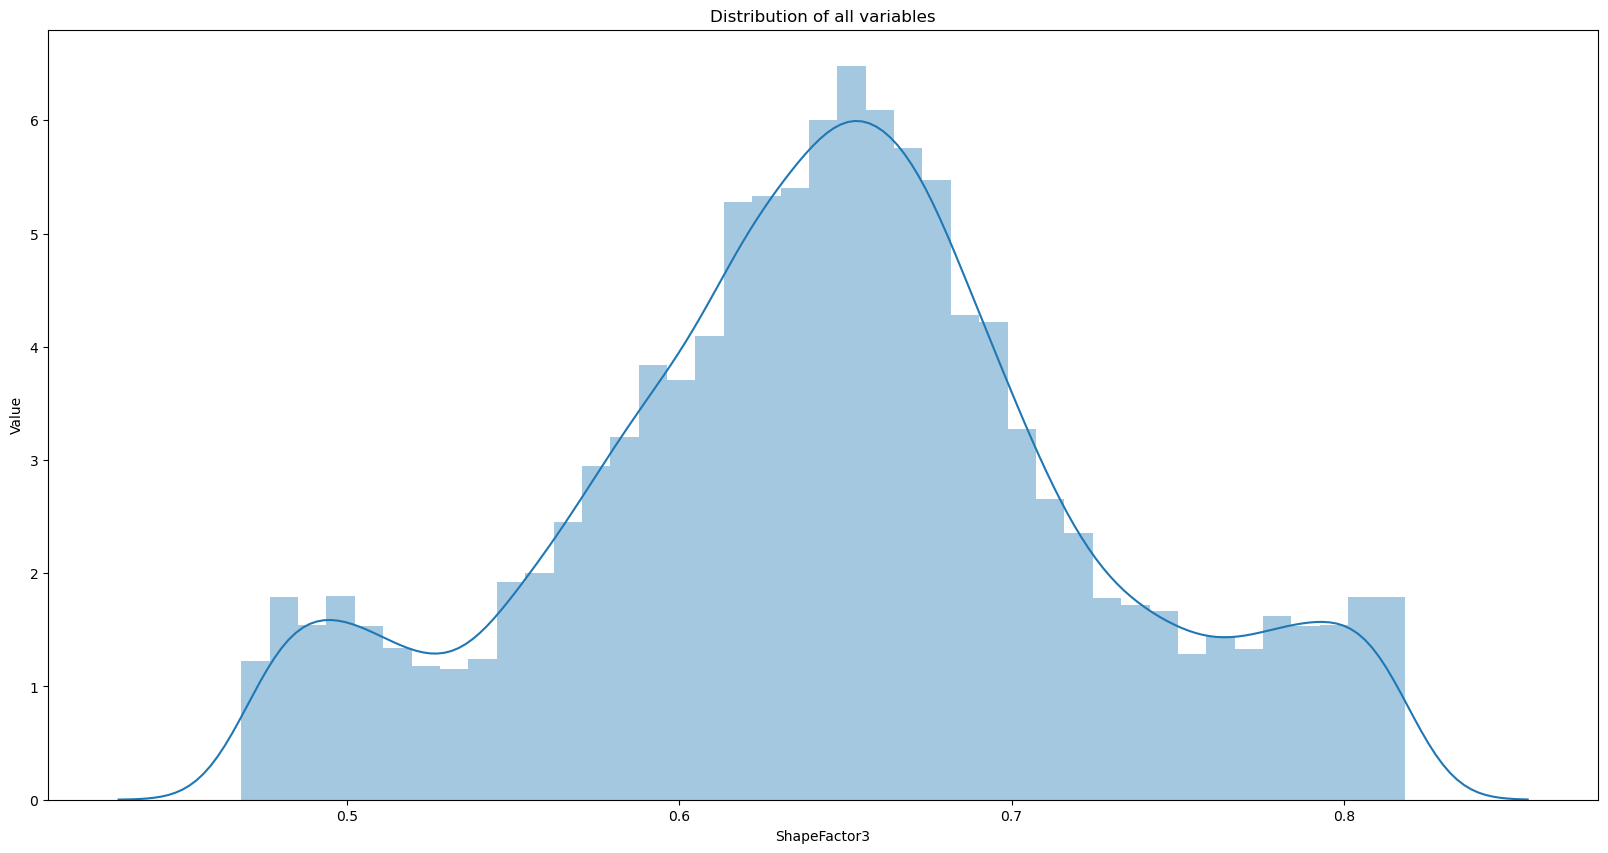

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


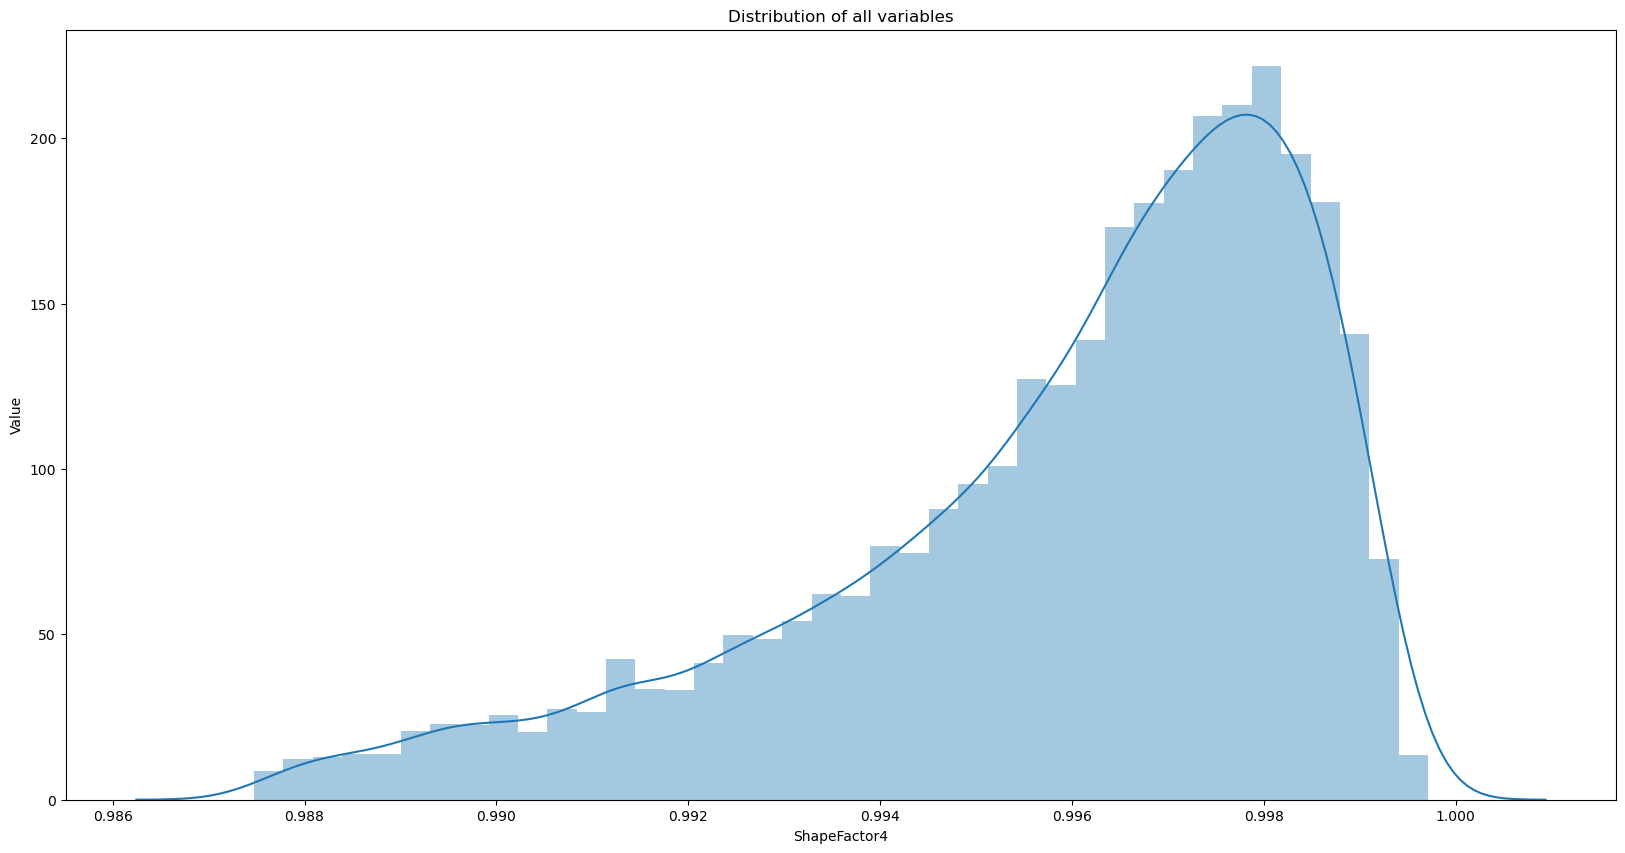

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


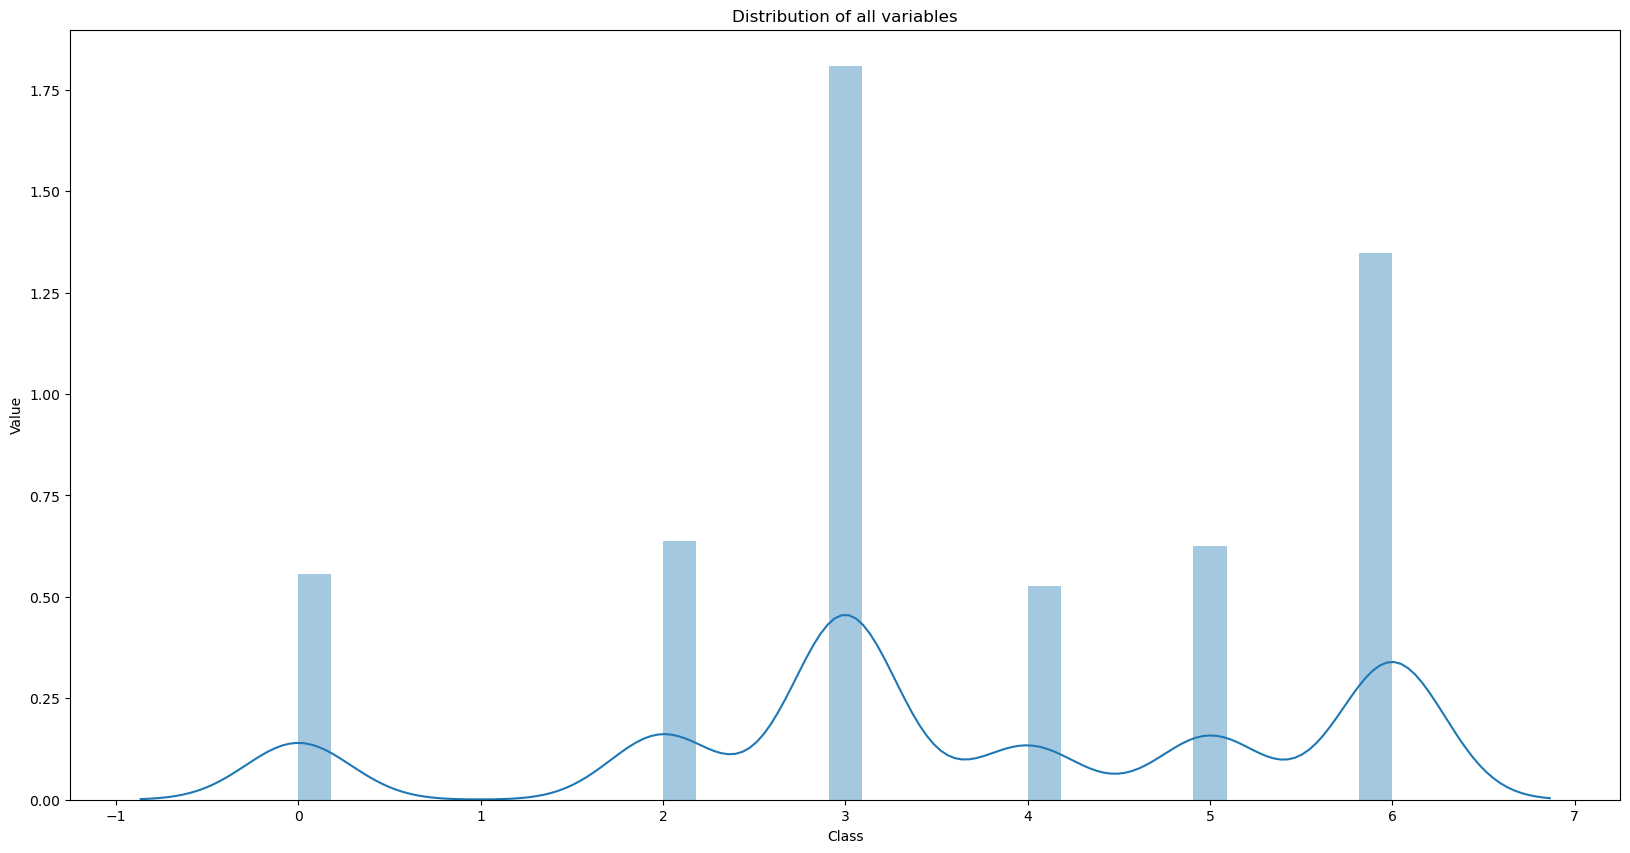

In [62]:
for b in Data.columns:
    plt.figure(figsize=(20,10))
    sb.distplot(Data[b])
    plt.xlabel(b)
    plt.ylabel('Value')
    plt.title('Distribution of all variables')
    plt.show()

In [63]:
from sklearn.preprocessing import MinMaxScaler
Msc = MinMaxScaler()
X1 = Msc.fit_transform(Xr)
X1

array([[0.14408478, 0.17562899, 0.15368081, ..., 0.71705857, 0.84268898,
        0.94948931],
       [0.1445729 , 0.17658715, 0.17711837, ..., 0.62726314, 0.71757696,
        0.61111634],
       [0.14631985, 0.1561744 , 0.13457131, ..., 0.80613857, 0.96833193,
        0.98416307],
       ...,
       [0.33162492, 0.35648926, 0.35800697, ..., 0.1976332 , 0.23370063,
        0.32156169],
       [0.33162492, 0.35648926, 0.35800697, ..., 0.1976332 , 0.23370063,
        0.32156169],
       [0.33162492, 0.35648926, 0.35800697, ..., 0.1976332 , 0.23370063,
        0.32156169]])

# Train_Test_Split :

In [64]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X1,Yr,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16622, 16), (4156, 16), (16622,), (4156,))

# LogisticRegression :

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
Log = LogisticRegression()
Log.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pre = Log.predict(x_test)
y_pre

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [69]:
Log.score(x_test,y_test)

0.9542829643888354

In [70]:
Log.score(x_train,y_train)

0.9537961737456383

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve

<AxesSubplot:>

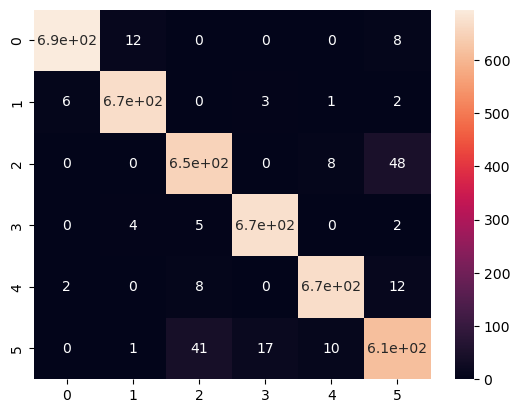

In [72]:
CM = confusion_matrix(y_test,y_pre)
sb.heatmap(CM,annot=True)

In [73]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       714
           2       0.98      0.98      0.98       680
           3       0.92      0.92      0.92       706
           4       0.97      0.98      0.98       684
           5       0.97      0.97      0.97       689
           6       0.90      0.90      0.90       683

    accuracy                           0.95      4156
   macro avg       0.95      0.95      0.95      4156
weighted avg       0.95      0.95      0.95      4156



In [74]:
LR = pd.DataFrame({'Actual':y_test,'Predict':y_pre})
LR

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction :

In [75]:
len(LR.loc[LR['Actual']!=LR['Predict']])

190

# DecisionTreeClassifier :

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pre_Dt = Dt.predict(x_test)
y_pre_Dt

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [79]:
Dt.score(x_test,y_test)

0.9355149181905679

In [80]:
Dt.score(x_train,y_train)

1.0

<AxesSubplot:>

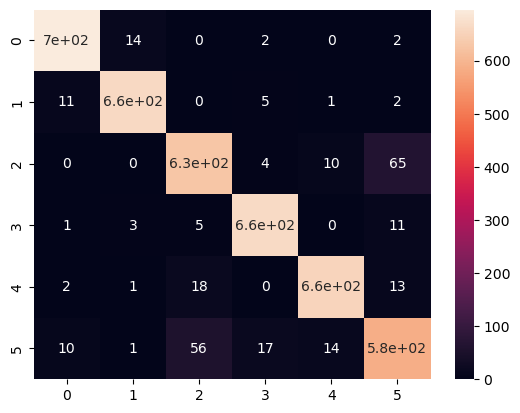

In [81]:
CM = confusion_matrix(y_test,y_pre_Dt)
sb.heatmap(CM,annot=True)

In [82]:
print(classification_report(y_test,y_pre_Dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       714
           2       0.97      0.97      0.97       680
           3       0.89      0.89      0.89       706
           4       0.96      0.97      0.97       684
           5       0.96      0.95      0.96       689
           6       0.86      0.86      0.86       683

    accuracy                           0.94      4156
   macro avg       0.94      0.94      0.94      4156
weighted avg       0.94      0.94      0.94      4156



In [83]:
DT = pd.DataFrame({'Actual':y_test,'Predict':y_pre_Dt})
DT

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [84]:
len(DT.loc[DT['Actual']!=DT['Predict']])

268

# SVM :
## RBF :

In [85]:
from sklearn.svm import SVC

In [86]:
S = SVC()
S.fit(x_train,y_train)

SVC()

In [87]:
y_pre_svc = S.predict(x_test)
y_pre_svc

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [88]:
S.score(x_test,y_test)

0.9595765158806545

In [89]:
S.score(x_train,y_train)

0.9581277824569847

<AxesSubplot:>

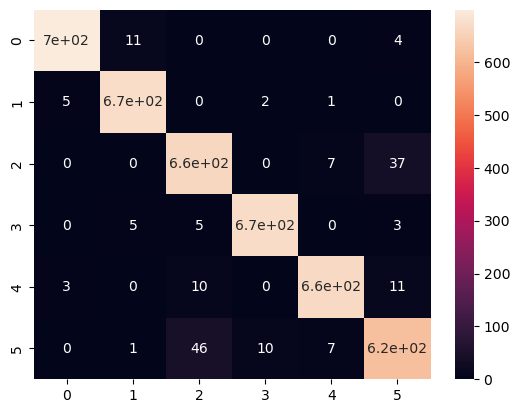

In [90]:
CM = confusion_matrix(y_test,y_pre_svc)
sb.heatmap(CM,annot=True)

In [91]:
print(classification_report(y_test,y_pre_svc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       714
           2       0.98      0.99      0.98       680
           3       0.92      0.94      0.93       706
           4       0.98      0.98      0.98       684
           5       0.98      0.97      0.97       689
           6       0.92      0.91      0.91       683

    accuracy                           0.96      4156
   macro avg       0.96      0.96      0.96      4156
weighted avg       0.96      0.96      0.96      4156



In [92]:
RBF = pd.DataFrame({'Actual':y_test,'Predict':y_pre_svc})
RBF

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [93]:
len(RBF.loc[RBF['Actual']!=RBF['Predict']])

168

# Linear :

In [94]:
L = SVC(kernel='linear')
L.fit(x_train,y_train)

SVC(kernel='linear')

In [95]:
y_pre_L = L.predict(x_test)
y_pre_L

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [96]:
L.score(x_test,y_test)

0.9559672762271415

In [97]:
L.score(x_train,y_train)

0.9560221393334135

<AxesSubplot:>

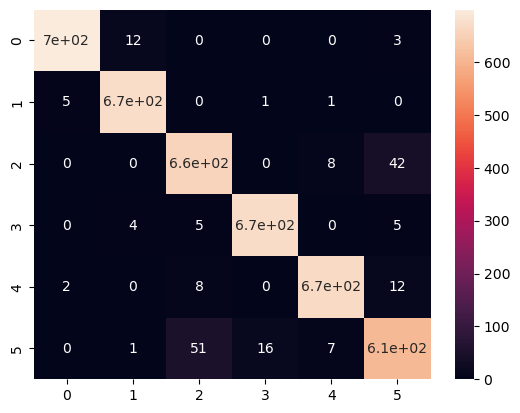

In [98]:
CM = confusion_matrix(y_test,y_pre_L)
sb.heatmap(CM,annot=True)

In [99]:
print(classification_report(y_test,y_pre_L))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       714
           2       0.98      0.99      0.98       680
           3       0.91      0.93      0.92       706
           4       0.98      0.98      0.98       684
           5       0.98      0.97      0.97       689
           6       0.91      0.89      0.90       683

    accuracy                           0.96      4156
   macro avg       0.96      0.96      0.96      4156
weighted avg       0.96      0.96      0.96      4156



In [100]:
Linear = pd.DataFrame({'Actual':y_test,'Predict':y_pre_L})
Linear

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [101]:
len(Linear.loc[Linear['Actual']!=Linear['Predict']])

183

## Poly :

In [102]:
P = SVC(kernel='poly')
P.fit(x_train,y_train)

SVC(kernel='poly')

In [103]:
y_pre_P = P.predict(x_test)
y_pre_P

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [104]:
P.score(x_test,y_test)

0.9581328200192493

In [105]:
P.score(x_train,y_train)

0.9610756828299843

<AxesSubplot:>

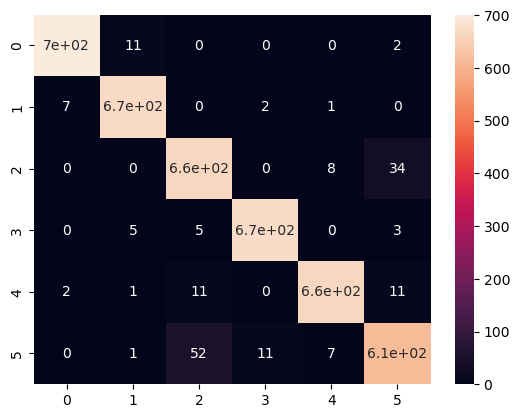

In [106]:
CM = confusion_matrix(y_test,y_pre_P)
sb.heatmap(CM,annot=True)

In [107]:
print(classification_report(y_test,y_pre_P))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       714
           2       0.97      0.99      0.98       680
           3       0.91      0.94      0.92       706
           4       0.98      0.98      0.98       684
           5       0.98      0.96      0.97       689
           6       0.92      0.90      0.91       683

    accuracy                           0.96      4156
   macro avg       0.96      0.96      0.96      4156
weighted avg       0.96      0.96      0.96      4156



In [108]:
Poly = pd.DataFrame({'Actual':y_test,'Predict':y_pre_P})
Poly

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [109]:
len(Poly.loc[Poly['Actual']!=Poly['Predict']])

174

## Sigmoid :

In [110]:
Sig = SVC(kernel='sigmoid')
Sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [111]:
y_pre_Sig = Sig.predict(x_test)
y_pre_Sig

array([5, 4, 2, ..., 2, 6, 2], dtype=int64)

In [112]:
Sig.score(x_test,y_test)

0.45500481231953804

In [113]:
Sig.score(x_train,y_train)

0.4474792443749248

<AxesSubplot:>

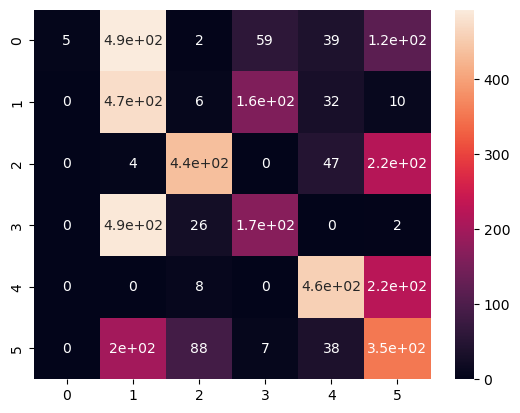

In [114]:
CM = confusion_matrix(y_test,y_pre_Sig)
sb.heatmap(CM,annot=True)

In [115]:
print(classification_report(y_test,y_pre_Sig))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       714
           2       0.29      0.70      0.41       680
           3       0.77      0.62      0.68       706
           4       0.43      0.25      0.31       684
           5       0.75      0.66      0.70       689
           6       0.38      0.52      0.44       683

    accuracy                           0.46      4156
   macro avg       0.60      0.46      0.43      4156
weighted avg       0.61      0.46      0.42      4156



In [116]:
Sigmoid = pd.DataFrame({'Actual':y_test,'Predict':y_pre_Sig})
Sigmoid

,Actual,Predict
18257,5,5
16774,4,4
11065,0,2
11555,0,2
18373,5,5
...,...,...
11480,0,2
18361,5,5
20160,6,2
2143,0,6


### Number of wrong Prediction : 

In [117]:
len(Sigmoid.loc[Sigmoid['Actual']!=Sigmoid['Predict']])

2265

# RandomForestClassifier :

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
Rfc = RandomForestClassifier()
Rfc.fit(x_train,y_train)

RandomForestClassifier()

In [120]:
y_pre_Rfc = Rfc.predict(x_test)
y_pre_Rfc

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [121]:
Rfc.score(x_test,y_test)

0.9538017324350336

In [122]:
Rfc.score(x_train,y_train)

1.0

<AxesSubplot:>

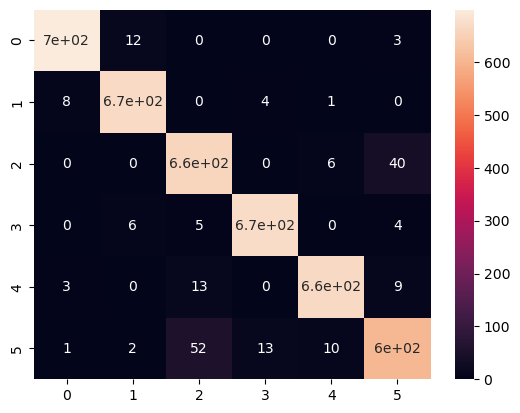

In [123]:
CM = confusion_matrix(y_test,y_pre_Rfc)
sb.heatmap(CM,annot=True)

In [124]:
print(classification_report(y_test,y_pre_Rfc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       714
           2       0.97      0.98      0.98       680
           3       0.90      0.93      0.92       706
           4       0.98      0.98      0.98       684
           5       0.98      0.96      0.97       689
           6       0.92      0.89      0.90       683

    accuracy                           0.95      4156
   macro avg       0.95      0.95      0.95      4156
weighted avg       0.95      0.95      0.95      4156



In [125]:
RF = pd.DataFrame({'Actual':y_test,'Predict':y_pre_Rfc})
RF

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [126]:
len(RF.loc[RF['Actual']!=RF['Predict']])

192

# KNeighborsClassifier (KNN) :

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
Knn = KNeighborsClassifier()
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [129]:
y_pre_Knn = Knn.predict(x_test)
y_pre_Knn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [130]:
Knn.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.949711260827719

In [131]:
Knn.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.966008903862351

<AxesSubplot:>

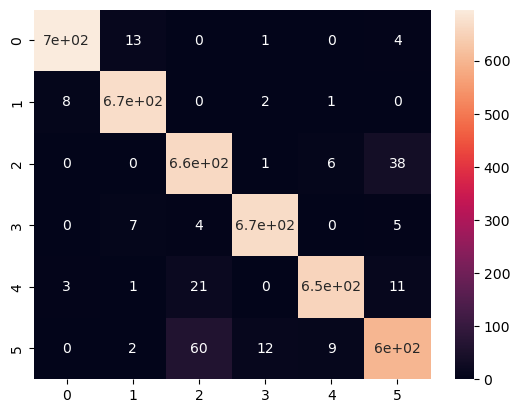

In [132]:
CM = confusion_matrix(y_test,y_pre_Knn)
sb.heatmap(CM,annot=True)

In [133]:
print(classification_report(y_test,y_pre_Knn))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       714
           2       0.97      0.98      0.98       680
           3       0.89      0.94      0.91       706
           4       0.98      0.98      0.98       684
           5       0.98      0.95      0.96       689
           6       0.91      0.88      0.89       683

    accuracy                           0.95      4156
   macro avg       0.95      0.95      0.95      4156
weighted avg       0.95      0.95      0.95      4156



In [134]:
KNC = pd.DataFrame({'Actual':y_test,'Predict':y_pre_Knn})
KNC

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [135]:
len(KNC.loc[KNC['Actual']!=KNC['Predict']])

209

# Naive Bayes :

In [136]:
from sklearn.naive_bayes import GaussianNB

In [137]:
Nb = GaussianNB()
Nb.fit(x_train,y_train)

GaussianNB()

In [138]:
y_pre_Nb = Nb.predict(x_test)
y_pre_Nb

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [139]:
Nb.score(x_test,y_test)

0.9331087584215592

In [140]:
Nb.score(x_train,y_train)

0.9325592588136205

<AxesSubplot:>

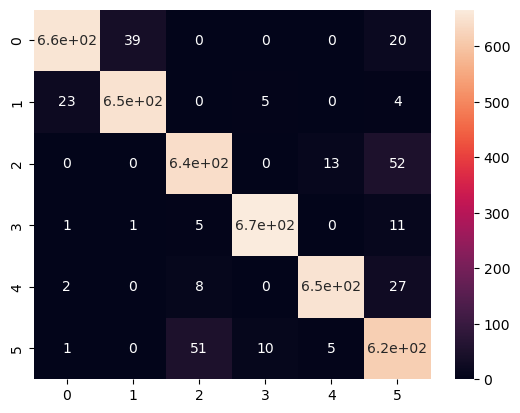

In [141]:
CM = confusion_matrix(y_test,y_pre_Nb)
sb.heatmap(CM,annot=True)

In [142]:
print(classification_report(y_test,y_pre_Nb))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       714
           2       0.94      0.95      0.95       680
           3       0.91      0.91      0.91       706
           4       0.98      0.97      0.98       684
           5       0.97      0.95      0.96       689
           6       0.84      0.90      0.87       683

    accuracy                           0.93      4156
   macro avg       0.93      0.93      0.93      4156
weighted avg       0.93      0.93      0.93      4156



In [143]:
NB = pd.DataFrame({'Actual':y_test,'Predict':y_pre_Nb})
NB

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [144]:
len(NB.loc[NB['Actual']!=NB['Predict']])

278

# VotingClassifier :

In [145]:
from sklearn.ensemble import VotingClassifier

In [146]:
a = [('Rbf',S),('Poly',P),('Liner',L),('Logistic',Log),('Random',Rfc)]

In [147]:
VC = VotingClassifier(estimators=a)
VC.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Rbf', SVC()), ('Poly', SVC(kernel='poly')),
                             ('Liner', SVC(kernel='linear')),
                             ('Logistic', LogisticRegression()),
                             ('Random', RandomForestClassifier())])

In [148]:
y_pre_VC = VC.predict(x_test)
y_pre_VC

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [149]:
VC.score(x_test,y_test)

0.9581328200192493

In [150]:
VC.score(x_train,y_train)

0.9601131031163518

<AxesSubplot:>

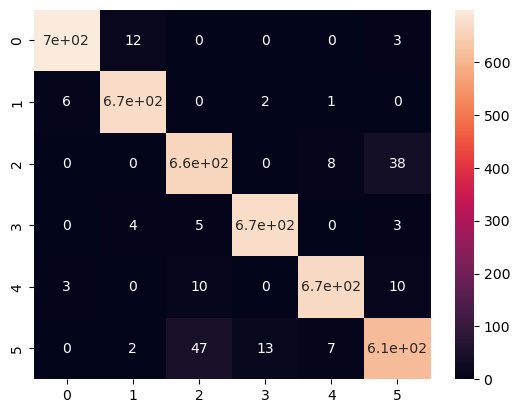

In [151]:
CM = confusion_matrix(y_test,y_pre_VC)
sb.heatmap(CM,annot=True)

In [152]:
print(classification_report(y_test,y_pre_VC))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       714
           2       0.97      0.99      0.98       680
           3       0.91      0.93      0.92       706
           4       0.98      0.98      0.98       684
           5       0.98      0.97      0.97       689
           6       0.92      0.90      0.91       683

    accuracy                           0.96      4156
   macro avg       0.96      0.96      0.96      4156
weighted avg       0.96      0.96      0.96      4156



In [153]:
Vc = pd.DataFrame({'Actual':y_test,'Predict':y_pre_VC})
Vc

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [154]:
len(Vc.loc[Vc['Actual']!=Vc['Predict']])

174

# BaggingClassifier :

In [155]:
from sklearn.ensemble import BaggingClassifier

In [156]:
BC = BaggingClassifier(base_estimator=S,n_estimators=100)
BC.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=100)

In [157]:
y_pre_BC = BC.predict(x_test)
y_pre_BC

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [158]:
BC.score(x_test,y_test)

0.9593358999037536

In [159]:
BC.score(x_train,y_train)

0.9584887498495969

<AxesSubplot:>

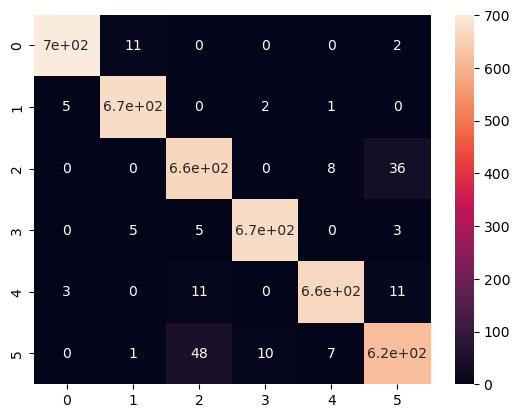

In [160]:
CM = confusion_matrix(y_test,y_pre_BC)
sb.heatmap(CM,annot=True)

In [161]:
print(classification_report(y_test,y_pre_BC))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       714
           2       0.98      0.99      0.98       680
           3       0.91      0.94      0.92       706
           4       0.98      0.98      0.98       684
           5       0.98      0.96      0.97       689
           6       0.92      0.90      0.91       683

    accuracy                           0.96      4156
   macro avg       0.96      0.96      0.96      4156
weighted avg       0.96      0.96      0.96      4156



In [162]:
Bc = pd.DataFrame({'Actual':y_test,'Predict':y_pre_BC})
Bc

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [163]:
len(Bc.loc[Bc['Actual']!=Bc['Predict']])

169

# BoostClassifier :
## AdaBoost :

In [164]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [165]:
AB = AdaBoostClassifier(base_estimator=Rfc,n_estimators=100,random_state=0)
AB.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                   random_state=0)

In [166]:
y_pre_AB = AB.predict(x_test)
y_pre_AB

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [167]:
AB.score(x_test,y_test)

0.953320500481232

In [168]:
AB.score(x_train,y_train)

1.0

<AxesSubplot:>

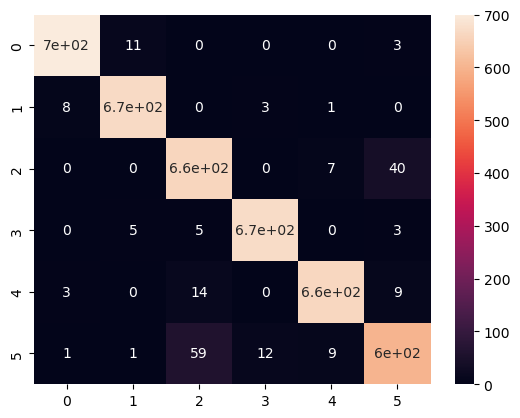

In [169]:
CM = confusion_matrix(y_test,y_pre_AB)
sb.heatmap(CM,annot=True)

In [170]:
print(classification_report(y_test,y_pre_AB))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       714
           2       0.98      0.98      0.98       680
           3       0.89      0.93      0.91       706
           4       0.98      0.98      0.98       684
           5       0.97      0.96      0.97       689
           6       0.92      0.88      0.90       683

    accuracy                           0.95      4156
   macro avg       0.95      0.95      0.95      4156
weighted avg       0.95      0.95      0.95      4156



In [171]:
Ab= pd.DataFrame({'Actual':y_test,'Predict':y_pre_AB})
Ab

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [172]:
len(Ab.loc[Ab['Actual']!=Ab['Predict']])

194

# GradientBoost :

In [173]:
GB = GradientBoostingClassifier(random_state=0)
GB.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [174]:
y_pre_GB = GB.predict(x_test)
y_pre_GB

array([5, 4, 0, ..., 6, 0, 6], dtype=int64)

In [175]:
GB.score(x_test,y_test)

0.9538017324350336

In [176]:
GB.score(x_train,y_train)

0.9752737336060643

<AxesSubplot:>

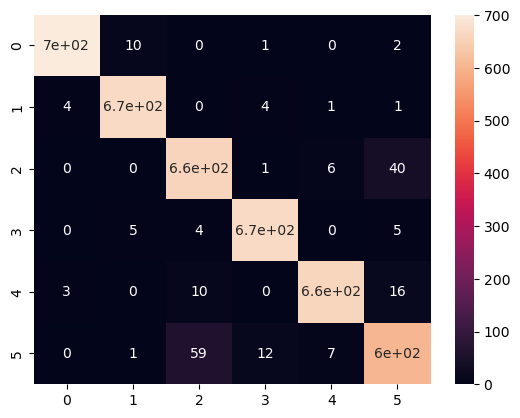

In [177]:
CM = confusion_matrix(y_test,y_pre_GB)
sb.heatmap(CM,annot=True)

In [178]:
print(classification_report(y_test,y_pre_GB))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       714
           2       0.98      0.99      0.98       680
           3       0.90      0.93      0.92       706
           4       0.97      0.98      0.98       684
           5       0.98      0.96      0.97       689
           6       0.90      0.88      0.89       683

    accuracy                           0.95      4156
   macro avg       0.95      0.95      0.95      4156
weighted avg       0.95      0.95      0.95      4156



In [179]:
Gb= pd.DataFrame({'Actual':y_test,'Predict':y_pre_GB})
Gb

,Actual,Predict
18257,5,5
16774,4,4
11065,0,0
11555,0,0
18373,5,5
...,...,...
11480,0,0
18361,5,5
20160,6,6
2143,0,0


### Number of wrong Prediction : 

In [180]:
len(Gb.loc[Gb['Actual']!=Gb['Predict']])

192